In [1]:
import pandas as pd
import math as math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap
from  matplotlib.ticker import PercentFormatter
import scipy.stats

In [2]:
data = pd.read_csv("data.csv",engine='python', delimiter=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2572 entries, 0 to 2571
Columns: 358 entries, Unnamed: 0 to na_count
dtypes: float64(24), int64(3), object(331)
memory usage: 7.0+ MB


In [4]:
pd.set_option('display.max_columns', None) #show all columns 
data.head(2)

,Unnamed: 0,Response.ID,Time.Started,Date.Submitted,Status,IP.Address,Longitude,Latitude,Country,City,State.Region,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade_oldest,grade_preschool,grade_endedschool,birthyear,school,school_rec,gender,q5,q6,q7,q7other,q7other2,q8,q9online_classes_for_edu,q9online_classes_to_test,q9online_classes_for_additional_edu,q9online_classes_didnt_use,q9presentations_school_for_edu,q9presentations_school_to_test,q9presentations_school_for_additional_edu,q9presentations_school_didnt_use,q9platforms_school_for_edu,q9platforms_school_to_test,q9platforms_school_for_add_edu,q9platforms_school_didnt_use,q9books_school_for_edu,q9books_school_to_test,q9books_school_for_add_edu,q9books_school_didnt_use,q9presentations_found_for_edu,q9presentations_found_to_test,q9presentations_found_for_add_edu,q9presentations_found_didnt_use,q9platforms_found_for_edu,q9platforms_found_to_test,q9platforms_found_for_add_edu,q9platforms_found_didnt_use,q9books_found_for_edu,q9books_found_to_test,q9books_found_for_add_edu,q9books_found_didnt_use,q9other_found_for_edu,q9other_found_to_test,q9other_found_for_add_edu,q9other_found_didnt_use,q10control_homework,q10interesting,q10help,q10talk,q10plans,q10friends,q10explain,q10help_homework,q10platforms,q10dop,q11control_homework,q11interesting,q11help,q11talk,q11plans,q11friends,q11explain,q11help_homework,q11platforms,q11dop,q11movies,q11books,q12googleclassroom,q12mesh,q12yandex_uch,q12yandex_sch,q12ya_class,q12uchi,q12internet_urok,q12meo,q12other,q12no,q12other2,q12other3,q13googleclassroom,q13mesh,q13yandex_uch,q13yandex_sch,q13ya_class,q13uchi,q13internet_urok,q13meo,q13other,q13no,q13other2,q13other3,q14,q15mom,q15stepmom,q15dad,q15stepdad,q15grandma,q15grandpa,q15bro_sis,q15nanny,q15other_relatives,q15other,q15nobody,q15other_relatives_text,q15other_text,q15other_rel_text2,q15other_text2,q16play,q16help,q16control,q16clean,q17play,q17help,q17control,q17clean,q18,q18other1,q18other2,q19,q20h,q20min,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,q31teach,q31org,q31support,q31therapy,q31other1,q31other2,q31other3,q32,q33_1,q33_2,q33_3,q33_4,q33_5,q33_6,q33_7,q33_8,q33_9,q33_10,q34_1,q34_2,q34_3,q34_4,q34_5,q34_6,q34_7,q34_8,q34_9,q34_10,q34_11,q34_12,q34other1,q34other2,q34other3,q35_1,q35_2,q35_3,q35_4,q35_5,q35_6,q36_1,q36_2,q36_3,q36_4,q36_5,q36_6,q36_7,q37,q38sport,q38lang,q38art,q38science,q38vuz,q38other,q38no,q38other2,q38other3,q39_1,q39_2,q39_3,q39_4,q39other,q39no,q39other2,q40,q41_1,q41_2,q41_3,q41_4,q41_5,q41_6,q42_1,q42_2,q42_3,q42other,q42no,q42other2,q42other3,q43_1,q43_2,q43_3,q43_4,q43_5,q43_6,q43_7,q43_8,q43_9,q43_10,q44_1,q44_2,q44_3,q44_4,q44_5,q44_6,q44_7,q44_8,q44_9,q44_10,q44_11,q44_12,q44_13,q44_14,q44_15,q44_16,q44_17,q45_1,q45_2,q45_3,q45_4,q.O,qДр,qДр_1,qДр_2,q46_1,q46_2,q46_3,q46_4,q46_5,q46_6,q46_7,q46other1,q46other2,q47,q48,q49,q50,q51,q52,q53_1,q53_2,q53_3,q53other1,q53other2,q53other3,q54,q55,q55_2,q56h,q56min,q57_1,q57_2,q57_3,q57_4,q57_5,q58,q59,q60,q61_1,q61_2,q61_3,q61_4,q61_5,q61_6,q62,q63,q64,q65,q66,q67,q67_other_rel,q67_other,q68birthyear_mom,q68birthyear_dad,q69mom,q69stepmom,q69dad,q69stepdad,q69bro,q69sis,q69grandma,q69grandpa,q69other_rel,q69other,q69other_rel_text,q69other_text,q70,q71,q72,q73,q73other,q74,q75h,q75min,q76,q76other,q77,q78,q79,q80,q80other,q81,q82hour,q82min,q83,q83other,q84,q85,q86mom_edu,q86dad_edu,q87room,q88auto,q89income,q90month,q90name,q90letter,na_count
0,1,30,30.04.2020 17:29,30.04.2020 17:32,Partial,176.59.103.99,44.001900,56.328300,Russian Federation,Nizhniy Novgorod,51.0,NaN,NaN,NaN,NaN,NaN,NaN,7 класс,8 класс,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,2110,2110,Мужской,"Да, школа сейчас закрыта, дети на дистанционно...",NaN,Очно,NaN,NaN,Месяц,NaN,NaN,"Для дополнительного образования (то, что не вк...",NaN,NaN,NaN,NaN,Не использовали,NaN,NaN,NaN,Не использовали,NaN,NaN,NaN,Не использовали,NaN,NaN,NaN,Не использовали,NaN,Для тестирования и оценки уровня знаний ребенка,NaN,NaN,"Для основной

In [5]:
# Перекодируем колонки с образованием для разделения на группы и наличие комнаты для краткости

data = data.fillna('Пропустили вопрос').replace({'Высшее, бакалавр или специалист':'Высшее',
                                              'Высшее, магистр':'Высшее',
                                              'Кандидат наук, доктор наук': 'Высшее',
                                              'Два и более высших образований':'Высшее',
                                              'Среднее профессиональное (например, колледж или техникум)': 'Без высшего',
                                              'Неоконченное высшее':'Без высшего',
                                              'Начальное профессиональное (например, профессиональное училище)': 'Без высшего',
                                              'Среднее (полное) общее или ниже': 'Без высшего',
                                              'Затрудняюсь ответить': 'Пропустили вопрос',
                                                'Нет, но есть детская комната, которую он делит с братом/сестрой (братьями, сестрами)':'Нет, делит с братом/сестрой',
                                                'Нет, ребенок живет в одной комнате со взрослыми родственниками': 'Нет, живет со взрослыми'
                                                })

In [6]:
# выберем только отетивших по образованию матери 
data_mom_edu = data.loc[data['q86mom_edu'] != 'Пропустили вопрос']

In [7]:
data.shape, data_mom_edu.shape

((2572, 358), (1416, 358))

In [8]:
mom_edu_count = data_mom_edu['q86mom_edu'].value_counts()
mom_edu_count

Высшее         1187
Без высшего     229
Name: q86mom_edu, dtype: int64

In [10]:
data_mom_edu.iloc[:,75:90]

,q10platforms,q10dop,q11control_homework,q11interesting,q11help,q11talk,q11plans,q11friends,q11explain,q11help_homework,q11platforms,q11dop,q11movies,q11books,q12googleclassroom
2,Раз в 1 или в 2 недели,Раз в месяц и реже,Несколько раз в неделю,Несколько раз в неделю,Никогда,Ежедневно,Ежедневно,Ежедневно,Ежедневно,Раз в 1 или в 2 недели,Раз в 1 или в 2 недели,Раз в 1 или в 2 недели,Несколько раз в неделю,Раз в месяц и реже,Google Classroom
3,Раз в месяц и реже,Раз в месяц и реже,Ежедневно,Ежедневно,Несколько раз в неделю,Ежедневно,Ежедневно,Ежедневно,Несколько раз в неделю,Несколько раз в неделю,Несколько раз в неделю,Раз в месяц и реже,Раз в 1 или в 2 недели,Раз в месяц и реже,Пропустили вопрос
4,Никогда,Раз в 1 или в 2 недели,Никогда,Ежедневно,Раз в 1 или в 2 недели,Ежедневно,Ежедневно,Несколько раз в неделю,Раз в 1 или в 2 недели,Никогда,Никогда,Никогда,Раз в 1 или в 2 недели,Раз в 1 или в 2 недели,Пропустили вопрос
7,Несколько раз в неделю,Несколько раз в неделю,Ежедневно,Несколько раз в неделю,Раз в 1 или в 2 недели,Ежедневно,Ежедневно,Ежедневно,Никогда,Несколько раз в неделю,Несколько раз в неделю,Несколько раз в неделю,Раз в 1 или в 2 недели,Никогда,Пропустили вопрос
8,Никогда,Несколько раз в неделю,Ежедневно,Несколько раз в неделю,Несколько раз в неделю,Несколько раз в неделю,Несколько раз в неделю,Несколько раз в неделю,Несколько раз в неделю,Несколько раз в неделю,Никогда,Несколько раз в неделю,Раз в 1 или в 2 недели,Несколько раз в неделю,Пропустили вопрос
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,Никогда,Раз в 1 или в 2 недели,Раз в месяц и реже,Ежедневно,Несколько раз в неделю,Ежедневно,Ежедневно,Раз в 1 или в 2 недели,Раз в 1 или в 2 недели,Раз в месяц и реже,Никогда,Раз в 1 или в 2 недели,Раз в месяц и реже,Раз в месяц и реже,Пропустили вопрос
2562,Никогда,Раз в месяц и реже,Раз в 1 или в 2 недели,Раз в месяц и реже,Несколько раз в неделю,Раз в 1 или в 2 недели,Раз в 1 или в 2 недели,Раз в месяц и реже,Ежедневно,Ежедневно,Никогда,Ежедневно,Раз в 1 или в 2 недели,Раз в 1 или в 2 недели,Google Classroom
2564,Никогда,Никогда,Несколько раз в неделю,Несколько раз в неделю,Несколько раз в неделю,Ежедневно,Ежедневно,Ежедневно,Раз в 1 или в 2 недели,Раз в 1 или в 2 недели,Никогда,Никогда,Раз в месяц и реже,Раз в 1 или в 2 недели,Google Classroom
2567,Никогда,Никогда,Никогда,Раз в 1 или в 2 недели,Раз в месяц и реже,Ежедневно,Ежедневно,Ежедневно,Никогда,Раз в месяц и реже,Никогда,Раз в месяц и реже,Никогда,Никогда,Пропустили вопрос


### Пункт 1. Помощь родителями детям в разрезе социального/финансого капитала. (Вопрос 11)

In [9]:
#Закодируем ответы по категориям помогал хоть раз и не помогал ни разу
def q11_renamer(df, col_name):
    df.loc[df[col_name] == 'Никогда', col_name] = 0
    df.loc[df[col_name] == 'Ежедневно',col_name] = 1
    df.loc[df[col_name] == 'Несколько раз в неделю',col_name] = 1
    df.loc[df[col_name] == 'Раз в 1 или в 2 недели',col_name] = 1
    df.loc[df[col_name] == 'Раз в месяц и реже',col_name] = 1

In [10]:
# # Функция для рассчета хи-квадрат:
# В конце функция добавляет необходимые значения в список, чтобы можно было потом 
# создать отдельную таблицу с результатами
def chi2_estimator(data,crosstab_val1,crosstab_val2, list_degf=None,
                   list_chi=None, list_pval=None):
    contingency_table=pd.crosstab(data[crosstab_val1],data[crosstab_val2])
    print('contingency_table :\n',contingency_table)
    print('============================================')
    #Observed Values
    Observed_Values = contingency_table.values 
    #print("Observed Values :\n",Observed_Values)
    
    #Expected Values
    b=scipy.stats.chi2_contingency(contingency_table)
    Expected_Values = b[3]
    #print("Expected Values :\n",Expected_Values)
    
    #Degree of Freedom
    no_of_rows=len(contingency_table.iloc[0:2,0])
    no_of_columns=len(contingency_table.iloc[0,0:2])
    df=(no_of_rows-1)*(no_of_columns-1)
    #print("Degree of Freedom:",df)
    
    #Significance Level 5%
    alpha=0.05
    
    #chi-square statistic - χ2
    from scipy.stats import chi2
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=round(chi_square[0]+chi_square[1], 2)
    #print("chi-square statistic:",chi_square_statistic)
    
    #critical_value
    critical_value=round((chi2.ppf(q=1-alpha,df=df)),2)
    #print('critical_value:',critical_value)
    
    #p-value
    p_value=round(1-chi2.cdf(x=chi_square_statistic,df=df),2)
    #print('p-value:',p_value)
    
    print('Significance level: ',alpha)
    print('Degree of Freedom: ',df)
    print('chi-square statistic:',chi_square_statistic)
    print('critical_value:',critical_value)
    print('p-value:',p_value)
    print('============================================')
    #compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
        chi_square_statistic = str(chi_square_statistic) + '*'
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
        p_value = str(p_value) + '*'
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    
    list_degf.append(df)
    list_chi.append(chi_square_statistic)
    list_pval.append(p_value)
    
    
    

In [29]:
list_degf = []
list_chi = []
list_pval = []

In [11]:
# Закодируем все колонки, каждая из которых представляет один из вариантов ответа для 11 вопроса
for col in  data_mom_edu.iloc[:,77:89]:
    q11_renamer(data_mom_edu,col)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
for col in  data_mom_edu.iloc[:,77:89]:
    print(col)
    print(chi2_estimator(data_mom_edu,"q86mom_edu",col,list_degf,list_chi, list_pval))

q11control_homework
contingency_table :
 q11control_homework    0     1
q86mom_edu                    
Без высшего           14   215
Высшее               136  1051
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 5.79
critical_value: 3.84
p-value: 0.02
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
None
q11interesting
contingency_table :
 q11interesting   0     1
q86mom_edu              
Без высшего      9   220
Высшее          71  1116
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 1.52
critical_value: 3.84
p-value: 0.22
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
None
q11help
contingency_table :
 q11help        0     1
q86mom_edu            
Без высшего   22   207
Высшее       157  1030
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 2.28
critica


### 11(1)Вы следите, чтобы ребёнок делал домашние задания

In [32]:
print(list_degf),
print(list_chi),
print(list_pval)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
['5.79*', 1.52, 2.28, 0.55, 0.21, 0.74, 2.95, 1.18, 2.36, 0.73, 3.19, 0.36]
['0.02*', 0.22, 0.13, 0.46, 0.65, 0.39, 0.09, 0.28, 0.12, 0.39, 0.07, 0.55]


In [27]:
# Вопросы
list_qw = ['Следит, чтобы делал домашнее задание',
          'Занимается с ребенком чем-то интересным',
          'Помогает ребенку с трудными предметами',
          'Дружески бесудует с ребенком',
          'Спрашивает ребенка о планах на день',
          'Беседует с ребенком о его друзьях',
          'Объясняет то, что ребенок не понял на уроке',
          'Помогает ребенку с домашним заданием',
          'Работает с ребенком на платформах для дистанционного обучения',
          'Подбирает дополнительные образовательные материалы',
          'Смотрит с ребенком образовательные фильмы и передачи',
          'Читает с ребенком интересные для него книги']

In [34]:
# Таблица с результатами, где * отмечаем статистически значимые различия 
dict_val = {'Утверждения': list_qw,
            'Степеней свободы': list_degf,
            'Хи-квадрат':list_chi,
            'p-уровень значимости':list_pval
           }
hypo_testing = pd.DataFrame(dict_val)
hypo_testing.set_index('Утверждения')

,Степеней свободы,Хи-квадрат,p-уровень значимости
Утверждения,,,
"Следит, чтобы делал домашнее задание",1,5.79*,0.02*
Занимается с ребенком чем-то интересным,1,1.52,0.22
Помогает ребенку с трудными предметами,1,2.28,0.13
Дружески бесудует с ребенком,1,0.55,0.46
Спрашивает ребенка о планах на день,1,0.21,0.65
Беседует с ребенком о его друзьях,1,0.74,0.39
"Объясняет то, что ребенок не понял на уроке",1,2.95,0.09
Помогает ребенку с домашним заданием,1,1.18,0.28
Работает с ребенком на платформах для дистанционного обучения,1,2.36,0.12


### 11 Вопрос. Помощь с практиками в разрезе материального состояния семьи

In [16]:
# Пронумеруем значения в каждой колонке, чтобы последующий код не был нагромажденным 

In [12]:
def q87_renamer(df, col_name):
    df.loc[df[col_name] == 'Да, есть своя комната', col_name] = 1
    df.loc[df[col_name] == 'Нет, делит с братом/сестрой',col_name] = 0
    df.loc[df[col_name] == 'Нет, живет со взрослыми',col_name] = 0
    df.loc[df[col_name] == 'Пропустили вопрос',col_name] = 0

In [13]:
def q88_renamer(df, col_name):
    df.loc[df[col_name] == 'Да', col_name] = 1
    df.loc[df[col_name] == 'Нет',col_name] = 0
    df.loc[df[col_name] == 'Пропустили вопрос',col_name] = 0

In [14]:
def q89_renamer(df, col_name):
    df.loc[df[col_name] == 'Материально обеспечены, можем позволить себе дорогостоящий отпуск и покупку автомобиля',col_name] = 1
    df.loc[df[col_name] == 'Достаточно обеспечены материально, но для покупки автомобиля и дорогостоящего отпуска пришлось бы залезть в долги', col_name] = 0
    df.loc[df[col_name] == 'На еду и одежду хватает, но покупка телевизора, холодильника и т. п. представляет трудности',col_name] = 0
    df.loc[df[col_name] == 'На еду денег хватает, но в других ежедневных расходах приходится себя ограничивать',col_name] = 0
    df.loc[df[col_name] == 'На ежедневные расходы хватает, но покупка одежды уже представляет трудности',col_name] = 0
    df.loc[df[col_name] == 'Иногда не хватает денег на необходимые продукты питания',col_name] = 0
    df.loc[df[col_name] == 'Пропустили вопрос',col_name] = 0

In [21]:
# Здесь есть необходимость классифицировать респондетов в зависимости от уровня достатка
# Для этого напишем следующуую функцию, предполая, что семью респондента с машиной, собственной комнатой у ребенка
# и оценивают себя достаточно обеспеченными, можно отнести к "Выше среднего" 
def FinSit_calssifier(row):
    if row['q87room'] == 1 and row['q88auto'] == 1 and row['q89income'] == 1:
        return 'Выше среднего'
    else:
        return 'Средний класс'

In [15]:
data_mom_edu.iloc[:1,350:360]

,q86dad_edu,q87room,q88auto,q89income,q90month,q90name,q90letter,na_count
2,Без высшего,"Да, есть своя комната",Да,"На еду и одежду хватает, но покупка телевизора...",10,евг,П,159


In [18]:
q87_renamer(data_mom_edu,'q87room')

In [19]:
q88_renamer(data_mom_edu, 'q88auto')

In [17]:
q89_renamer(data_mom_edu, 'q89income')

In [22]:
data_mom_edu['fin_situation'] = data_mom_edu.apply(FinSit_calssifier, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
# Новые списки для проверки связи с финансовым состоянием семьи
list_degf1 = []
list_chi1 = []
list_pval1 = []

In [24]:
for col in  data_mom_edu.iloc[:,77:89]:
    print(col)
    print(chi2_estimator(data_mom_edu,"fin_situation",col,list_degf1,list_chi1, list_pval1))

q11control_homework
contingency_table :
 q11control_homework    0     1
fin_situation                 
Выше среднего         15    76
Средний класс        135  1190
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 3.56
critical_value: 3.84
p-value: 0.06
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
None
q11interesting
contingency_table :
 q11interesting   0     1
fin_situation           
Выше среднего    5    86
Средний класс   75  1250
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.0
critical_value: 3.84
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
None
q11help
contingency_table :
 q11help          0     1
fin_situation           
Выше среднего   20    71
Средний класс  159  1166
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 7.68

In [25]:
print(list_degf1),
print(list_chi1),
print(list_pval1)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[3.56, 0.0, '7.68*', 0.83, 3.56, 1.24, 0.75, 2.71, '7.91*', 0.38, '3.88*', 0.51]
[0.06, 1.0, '0.01*', 0.36, 0.06, 0.27, 0.39, 0.1, '0.0*', 0.54, '0.05*', 0.48]


In [28]:
dict_val1 = {'Утверждения': list_qw,
            'Степеней свободы': list_degf1,
            'Хи-квадрат':list_chi1,
            'p-уровень значимости':list_pval1
           }
hypo_testing1 = pd.DataFrame(dict_val1)
hypo_testing1.set_index('Утверждения')

,Степеней свободы,Хи-квадрат,p-уровень значимости
Утверждения,,,
"Следит, чтобы делал домашнее задание",1,3.56,0.06
Занимается с ребенком чем-то интересным,1,0,1
Помогает ребенку с трудными предметами,1,7.68*,0.01*
Дружески бесудует с ребенком,1,0.83,0.36
Спрашивает ребенка о планах на день,1,3.56,0.06
Беседует с ребенком о его друзьях,1,1.24,0.27
"Объясняет то, что ребенок не понял на уроке",1,0.75,0.39
Помогает ребенку с домашним заданием,1,2.71,0.1
Работает с ребенком на платформах для дистанционного обучения,1,7.91*,0.0*


In [47]:
data_mom_edu.iloc[:2,75:90]

,q10platforms,q10dop,q11control_homework,q11interesting,q11help,q11talk,q11plans,q11friends,q11explain,q11help_homework,q11platforms,q11dop,q11movies,q11books,q12googleclassroom
2,Раз в 1 или в 2 недели,Раз в месяц и реже,1,1,0,1,1,1,1,1,1,1,1,1,Google Classroom
3,Раз в месяц и реже,Раз в месяц и реже,1,1,1,1,1,1,1,1,1,1,1,1,Пропустили вопрос


In [48]:
# 11ый вопрос в разрезе социального капитала 

sns.set_style("white")
plt.rcParams['figure.figsize'] = [8, 7]
rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)

cnt = 0

for col,qw in  zip(data_mom_edu.iloc[:,77:89], list_qw):
    cnt += 1
    g = sns.barplot(x="q86mom_edu", y=col,
            capsize=.8,
            data=data_mom_edu)
    g.set_xlabel(qw, fontsize=15)
    g.set_ylabel('Опрошенных',fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))
    sns.despine(left=False, bottom=True, right=True)
    plt.savefig(str(qw)+"_соц.png", bbox_inches='tight')
    plt.clf()

<Figure size 576x504 with 0 Axes>

#### Далее строим графики с доверительными интервалами, чтобы проверить достоверность наших выводов о гипотезах 

In [36]:
# 11ый вопрос в разрезе фин капитала
sns.set_style("white")
plt.rcParams['figure.figsize'] = [8, 7]
rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)

cnt = 0

for col,qw in  zip(data_mom_edu.iloc[:,77:89], list_qw):
    cnt += 1
    g = sns.barplot(x="fin_situation", y=col,
            capsize=.8,
            data=data_mom_edu)
    g.set_xlabel(qw, fontsize=15)
    g.set_ylabel('Опрошенных',fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))
    sns.despine(left=False, bottom=True, right=True)
    plt.savefig(str(qw)+"_фин.png", bbox_inches='tight')
    plt.clf()

<Figure size 576x504 with 0 Axes>

In [37]:
pd.set_option('display.max_columns', None) #show all columns 
data.head(2)

,Unnamed: 0,Response.ID,Time.Started,Date.Submitted,Status,IP.Address,Longitude,Latitude,Country,City,State.Region,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade_oldest,grade_preschool,grade_endedschool,birthyear,school,school_rec,gender,q5,q6,q7,q7other,q7other2,q8,q9online_classes_for_edu,q9online_classes_to_test,q9online_classes_for_additional_edu,q9online_classes_didnt_use,q9presentations_school_for_edu,q9presentations_school_to_test,q9presentations_school_for_additional_edu,q9presentations_school_didnt_use,q9platforms_school_for_edu,q9platforms_school_to_test,q9platforms_school_for_add_edu,q9platforms_school_didnt_use,q9books_school_for_edu,q9books_school_to_test,q9books_school_for_add_edu,q9books_school_didnt_use,q9presentations_found_for_edu,q9presentations_found_to_test,q9presentations_found_for_add_edu,q9presentations_found_didnt_use,q9platforms_found_for_edu,q9platforms_found_to_test,q9platforms_found_for_add_edu,q9platforms_found_didnt_use,q9books_found_for_edu,q9books_found_to_test,q9books_found_for_add_edu,q9books_found_didnt_use,q9other_found_for_edu,q9other_found_to_test,q9other_found_for_add_edu,q9other_found_didnt_use,q10control_homework,q10interesting,q10help,q10talk,q10plans,q10friends,q10explain,q10help_homework,q10platforms,q10dop,q11control_homework,q11interesting,q11help,q11talk,q11plans,q11friends,q11explain,q11help_homework,q11platforms,q11dop,q11movies,q11books,q12googleclassroom,q12mesh,q12yandex_uch,q12yandex_sch,q12ya_class,q12uchi,q12internet_urok,q12meo,q12other,q12no,q12other2,q12other3,q13googleclassroom,q13mesh,q13yandex_uch,q13yandex_sch,q13ya_class,q13uchi,q13internet_urok,q13meo,q13other,q13no,q13other2,q13other3,q14,q15mom,q15stepmom,q15dad,q15stepdad,q15grandma,q15grandpa,q15bro_sis,q15nanny,q15other_relatives,q15other,q15nobody,q15other_relatives_text,q15other_text,q15other_rel_text2,q15other_text2,q16play,q16help,q16control,q16clean,q17play,q17help,q17control,q17clean,q18,q18other1,q18other2,q19,q20h,q20min,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,q31teach,q31org,q31support,q31therapy,q31other1,q31other2,q31other3,q32,q33_1,q33_2,q33_3,q33_4,q33_5,q33_6,q33_7,q33_8,q33_9,q33_10,q34_1,q34_2,q34_3,q34_4,q34_5,q34_6,q34_7,q34_8,q34_9,q34_10,q34_11,q34_12,q34other1,q34other2,q34other3,q35_1,q35_2,q35_3,q35_4,q35_5,q35_6,q36_1,q36_2,q36_3,q36_4,q36_5,q36_6,q36_7,q37,q38sport,q38lang,q38art,q38science,q38vuz,q38other,q38no,q38other2,q38other3,q39_1,q39_2,q39_3,q39_4,q39other,q39no,q39other2,q40,q41_1,q41_2,q41_3,q41_4,q41_5,q41_6,q42_1,q42_2,q42_3,q42other,q42no,q42other2,q42other3,q43_1,q43_2,q43_3,q43_4,q43_5,q43_6,q43_7,q43_8,q43_9,q43_10,q44_1,q44_2,q44_3,q44_4,q44_5,q44_6,q44_7,q44_8,q44_9,q44_10,q44_11,q44_12,q44_13,q44_14,q44_15,q44_16,q44_17,q45_1,q45_2,q45_3,q45_4,q.O,qДр,qДр_1,qДр_2,q46_1,q46_2,q46_3,q46_4,q46_5,q46_6,q46_7,q46other1,q46other2,q47,q48,q49,q50,q51,q52,q53_1,q53_2,q53_3,q53other1,q53other2,q53other3,q54,q55,q55_2,q56h,q56min,q57_1,q57_2,q57_3,q57_4,q57_5,q58,q59,q60,q61_1,q61_2,q61_3,q61_4,q61_5,q61_6,q62,q63,q64,q65,q66,q67,q67_other_rel,q67_other,q68birthyear_mom,q68birthyear_dad,q69mom,q69stepmom,q69dad,q69stepdad,q69bro,q69sis,q69grandma,q69grandpa,q69other_rel,q69other,q69other_rel_text,q69other_text,q70,q71,q72,q73,q73other,q74,q75h,q75min,q76,q76other,q77,q78,q79,q80,q80other,q81,q82hour,q82min,q83,q83other,q84,q85,q86mom_edu,q86dad_edu,q87room,q88auto,q89income,q90month,q90name,q90letter,na_count
0,1,30,30.04.2020 17:29,30.04.2020 17:32,Partial,176.59.103.99,44.0019,56.3283,Russian Federation,Nizhniy Novgorod,51,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,7 класс,8 класс,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,2005.0,2110,2110,Мужской,"Да, школа сейчас закрыта, дети на дистанционно...",Пропустили вопрос,Очно,Пропустили вопрос,Пропустили вопрос,Месяц,Пропустили вопрос,Пропустили вопрос,"Для допо

### Пункт 2. Сколько тратили времени на поддержку в разрезе социального/финансового капитала 

In [38]:
data_mom_edu['q14'].value_counts().sum()

1416

In [39]:
q14_dummies = pd.get_dummies(data_mom_edu['q14'])
q14_dummies

,1-2 часа каждый день,3 и более часов в день,Вообще не трачу,Менее 1 часа в день
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
7,0,0,0,1
8,1,0,0,0
...,...,...,...,...
2560,0,0,1,0
2562,0,1,0,0
2564,0,0,1,0
2567,0,0,1,0


In [40]:
# новая табличка по 14 вопросу с бинарными ответами на каждый вопрос с дополнительными колонками 
# с социальным и финансовым капиталом. Далее перед каждым графиком будем делать такие таблицы 
q14_dummies = pd.get_dummies(data_mom_edu['q14'])
q14_dummies['fin_situation'] = data_mom_edu.apply(FinSit_calssifier, axis=1)
q14_dummies['q86mom_edu'] = data_mom_edu['q86mom_edu']

IndexError: index 4 is out of bounds for axis 0 with size 4

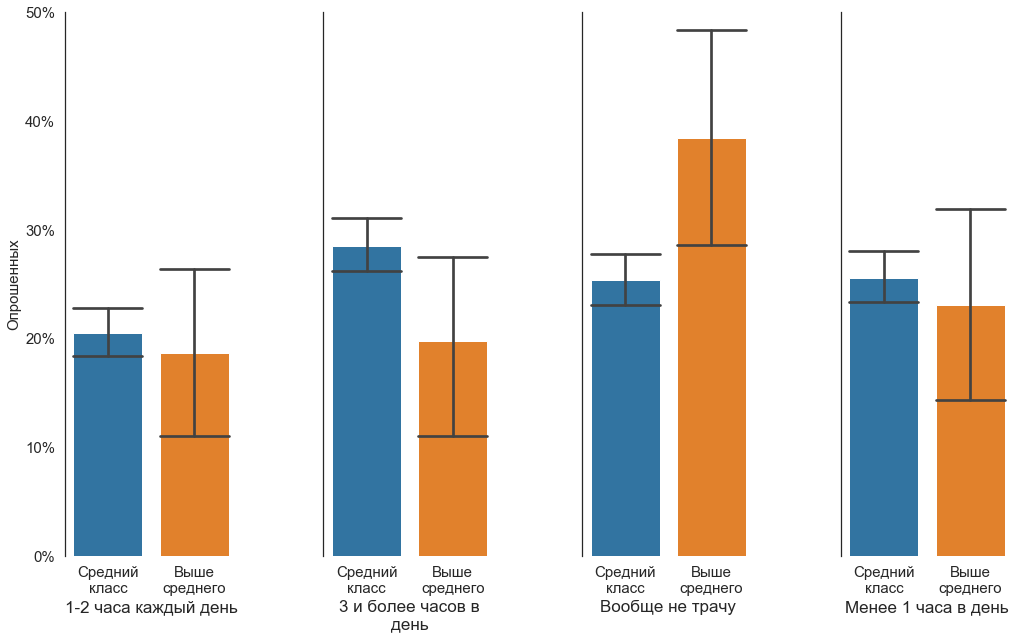

In [46]:
# 14ый вопрос в разрезе финансого состояния 

fig, axs = plt.subplots(1,4)
plt.rcParams['figure.figsize'] = [17, 10]
plt.subplots_adjust(wspace=0.5)
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)

# длеаем счетсик cnt и далее на каждой итерации создаем новый график для каждого ответа 
cnt = 0
sns.set_style("white")
for col in q14_dummies:
    g = sns.barplot(x="fin_situation", y=col, 
            capsize=.8,
            data=q14_dummies, ax=axs[cnt])
    g.set_xlabel('\n'.join(wrap(col,20)), fontsize=17, wrap=True)   
    g.set_ylabel('Опрошенных',fontsize=15)
    
    labels = ['Средний класс', 'Выше среднего']
    labels = [ '\n'.join(wrap(l,10)) for l in labels ]
    g.set_xticklabels(labels) 
    plt.xticks(fontsize=15)
    g.set(ylim=(0, 0.5))
    g.yaxis.set_major_formatter(PercentFormatter(1))

    # убираем метки на графиках кроме первого
    if cnt != 0:
        g.set_ylabel('')
        g.set_yticks([])
    cnt +=1
    plt.savefig('Трата времени на помощь ребенку' +"_фин.png",bbox_inches='tight')


IndexError: index 4 is out of bounds for axis 0 with size 4

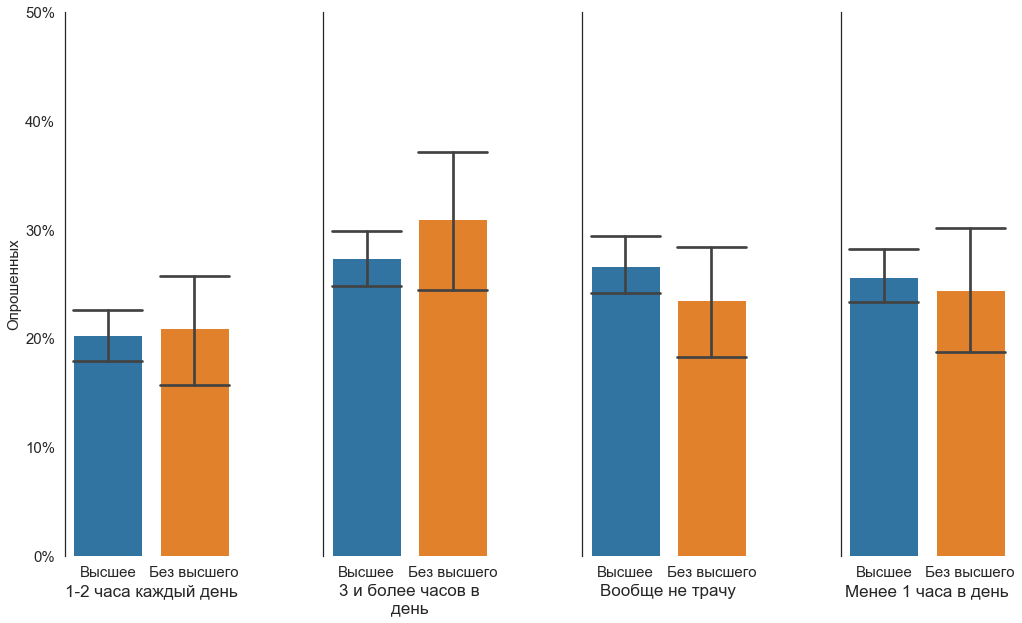

In [286]:
# 14ый вопрос в разрезе социального капитала состояния 

fig, axs = plt.subplots(1,4)
plt.rcParams['figure.figsize'] = [17, 10]
plt.subplots_adjust(wspace=0.5)
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)


cnt = 0
sns.set_style("white")
for col in q14_dummies:
    g = sns.barplot(x="q86mom_edu", y=col, 
            capsize=.8,
            data=q14_dummies, ax=axs[cnt])
    g.set_xlabel('\n'.join(wrap(col,20)), fontsize=17, wrap=True)
    g.set_ylabel('Опрошенных',fontsize=15)
    plt.xticks(fontsize=15)
    g.set(ylim=(0, 0.5))
    g.yaxis.set_major_formatter(PercentFormatter(1))

    
    if cnt != 0:
        g.set_ylabel('')
        g.set_yticks([])
    cnt +=1
    plt.savefig('Трата времени на помощь ребенку' +"_соц.png",bbox_inches='tight')


###  Пункт 3. Усилия, прилагаемые родителями в разрезе капиталов 

In [55]:
data_mom_edu['q22'].value_counts().sum()

1416

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


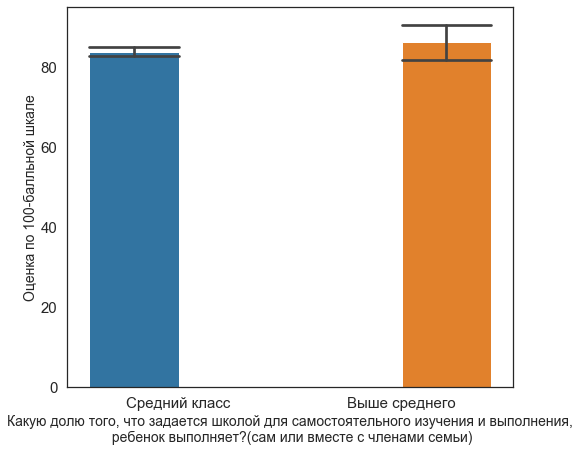

In [47]:
# 22ой вопрос в разрезе финансого капитала

plt.rcParams['figure.figsize'] = [8, 7]
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)

data_mom_edu['q22'] = pd.to_numeric(data_mom_edu['q22'])
g = sns.barplot(x='fin_situation',y='q22', data=data_mom_edu, capsize=.4, hue='fin_situation')
g.get_legend().remove()
g.set_ylabel('Оценка по 100-балльной шкале',  fontsize=14)
g.set_xlabel('Какую долю того, что задается школой для самостоятельного изучения и выполнения,\n ребенок выполняет?(сам или вместе с членами семьи)', fontsize=14)
plt.savefig("Оценка доли самостоятельного ДЗ(фин).png")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


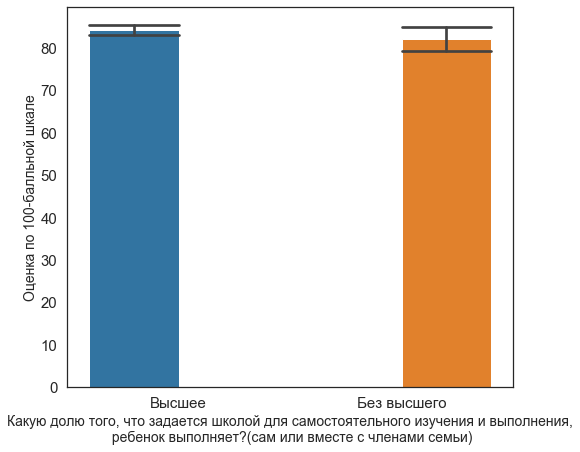

In [62]:
# 22ой вопрос в разрезе социального капитала

plt.rcParams['figure.figsize'] = [8, 7]
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)

cnt = 0
data_mom_edu['q22'] = pd.to_numeric(data_mom_edu['q22'])
g = sns.barplot(x='q86mom_edu',y='q22', data=data_mom_edu, capsize=.4, hue='q86mom_edu')
g.get_legend().remove()
g.set_ylabel('Оценка по 100-балльной шкале',  fontsize=14)
g.set_xlabel('Какую долю того, что задается школой для самостоятельного изучения и выполнения,\n ребенок выполняет?(сам или вместе с членами семьи)', fontsize=14)
plt.savefig("Оценка доли самостоятельного ДЗ(соц).png")

In [51]:
q18_dummies = pd.get_dummies(data_mom_edu['q18'])
q18_dummies['fin_situation'] = data_mom_edu.apply(FinSit_calssifier, axis=1)
q18_dummies['q86mom_edu'] = data_mom_edu['q86mom_edu']
q18_dummies = q18_dummies.drop(['Другое'], axis=1)

IndexError: index 4 is out of bounds for axis 0 with size 4

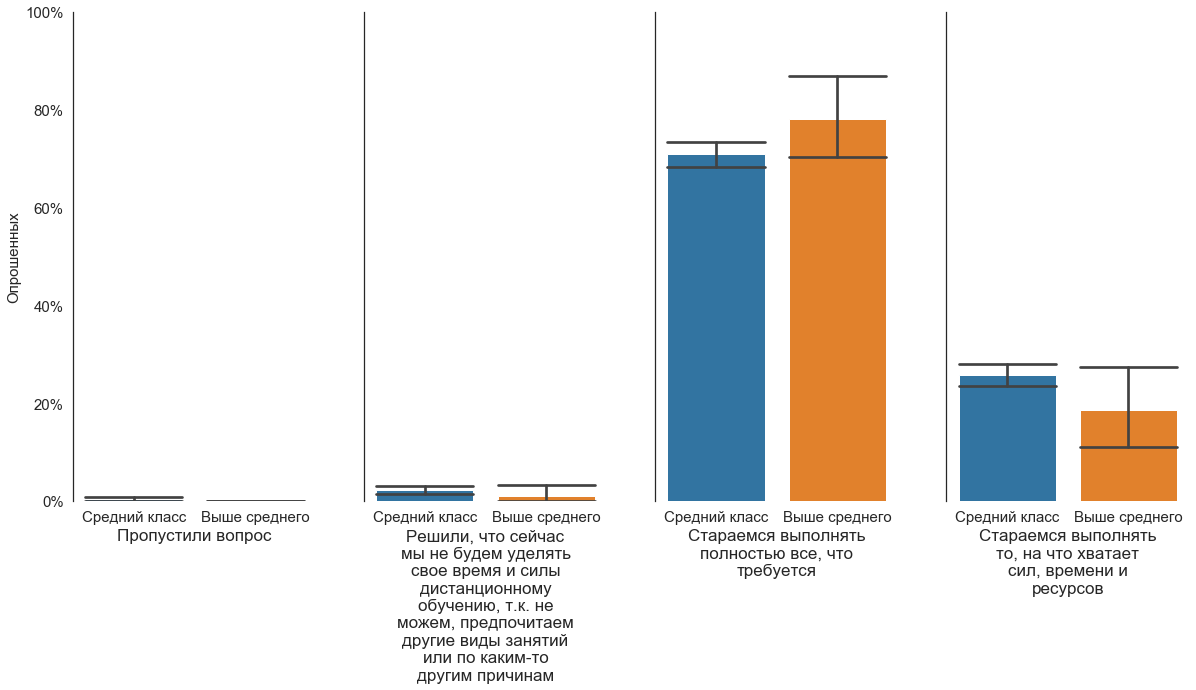

In [53]:
# 18-ый вопрос в разрезе финансового капитала
fig, axs = plt.subplots(1,4)
plt.rcParams['figure.figsize'] = [20, 9]
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)


cnt = 0
sns.set_style("white")
for col in q18_dummies:
    g = sns.barplot(x="fin_situation", y=col,
            capsize=.8,
            data=q18_dummies, ax=axs[cnt])
    g.set_xlabel('\n'.join(wrap(col,20)), fontsize=17, wrap=True)
    g.set_ylabel('Опрошенных',fontsize=15)
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))

    
    if cnt != 0:
        g.set_ylabel('')
        g.set_yticks([])
    cnt +=1
    plt.savefig(col + "_фин.png",bbox_inches='tight')

IndexError: index 4 is out of bounds for axis 0 with size 4

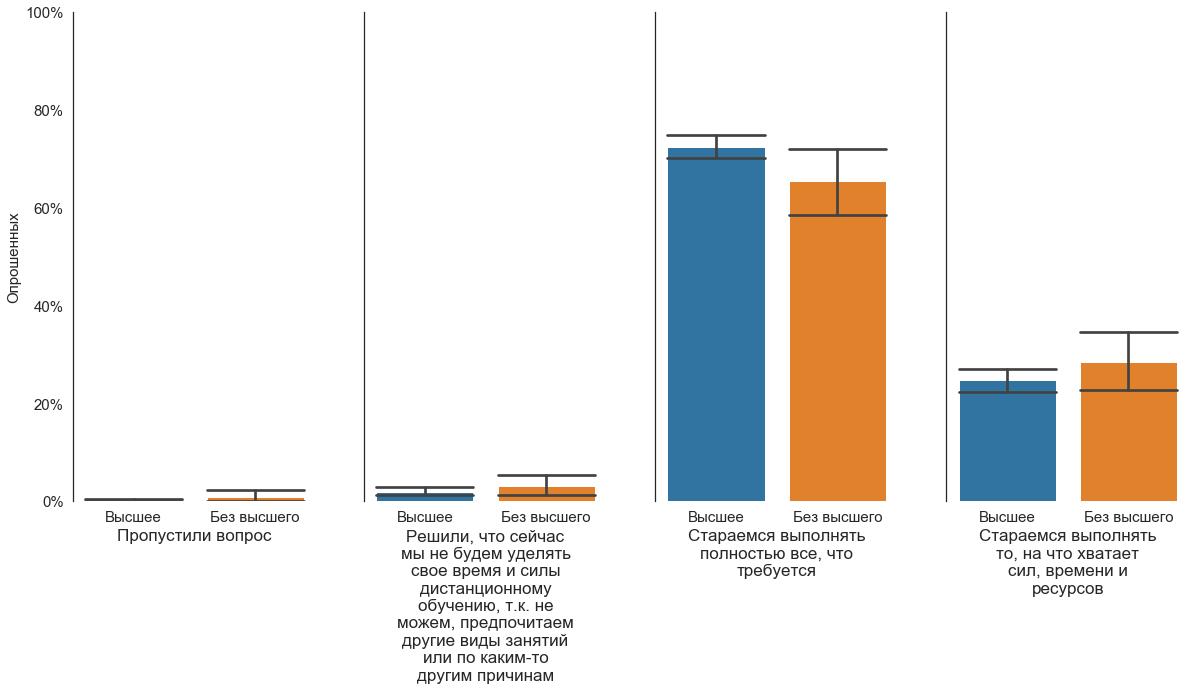

In [53]:
# 18-ый вопрос в разрезе социального капитала
fig, axs = plt.subplots(1,4)
plt.rcParams['figure.figsize'] = [20, 9]
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)


cnt = 0
sns.set_style("white")
for col in q18_dummies:
    g = sns.barplot(x="q86mom_edu", y=col,
            capsize=.8,
            data=q18_dummies, ax=axs[cnt])
    g.set_xlabel('\n'.join(wrap(col,20)), fontsize=17, wrap=True)
    g.set_ylabel('Опрошенных',fontsize=15)
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))

    
    if cnt != 0:
        g.set_ylabel('')
        g.set_yticks([])
    cnt +=1
    plt.savefig(col + "_соц.png",bbox_inches='tight')

In [173]:
pd.set_option('display.max_columns', None) #show all columns 
data.head(2)

,Unnamed: 0,Response.ID,Time.Started,Date.Submitted,Status,IP.Address,Longitude,Latitude,Country,City,State.Region,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade_oldest,grade_preschool,grade_endedschool,birthyear,school,school_rec,gender,q5,q6,q7,q7other,q7other2,q8,q9online_classes_for_edu,q9online_classes_to_test,q9online_classes_for_additional_edu,q9online_classes_didnt_use,q9presentations_school_for_edu,q9presentations_school_to_test,q9presentations_school_for_additional_edu,q9presentations_school_didnt_use,q9platforms_school_for_edu,q9platforms_school_to_test,q9platforms_school_for_add_edu,q9platforms_school_didnt_use,q9books_school_for_edu,q9books_school_to_test,q9books_school_for_add_edu,q9books_school_didnt_use,q9presentations_found_for_edu,q9presentations_found_to_test,q9presentations_found_for_add_edu,q9presentations_found_didnt_use,q9platforms_found_for_edu,q9platforms_found_to_test,q9platforms_found_for_add_edu,q9platforms_found_didnt_use,q9books_found_for_edu,q9books_found_to_test,q9books_found_for_add_edu,q9books_found_didnt_use,q9other_found_for_edu,q9other_found_to_test,q9other_found_for_add_edu,q9other_found_didnt_use,q10control_homework,q10interesting,q10help,q10talk,q10plans,q10friends,q10explain,q10help_homework,q10platforms,q10dop,q11control_homework,q11interesting,q11help,q11talk,q11plans,q11friends,q11explain,q11help_homework,q11platforms,q11dop,q11movies,q11books,q12googleclassroom,q12mesh,q12yandex_uch,q12yandex_sch,q12ya_class,q12uchi,q12internet_urok,q12meo,q12other,q12no,q12other2,q12other3,q13googleclassroom,q13mesh,q13yandex_uch,q13yandex_sch,q13ya_class,q13uchi,q13internet_urok,q13meo,q13other,q13no,q13other2,q13other3,q14,q15mom,q15stepmom,q15dad,q15stepdad,q15grandma,q15grandpa,q15bro_sis,q15nanny,q15other_relatives,q15other,q15nobody,q15other_relatives_text,q15other_text,q15other_rel_text2,q15other_text2,q16play,q16help,q16control,q16clean,q17play,q17help,q17control,q17clean,q18,q18other1,q18other2,q19,q20h,q20min,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,q31teach,q31org,q31support,q31therapy,q31other1,q31other2,q31other3,q32,q33_1,q33_2,q33_3,q33_4,q33_5,q33_6,q33_7,q33_8,q33_9,q33_10,q34_1,q34_2,q34_3,q34_4,q34_5,q34_6,q34_7,q34_8,q34_9,q34_10,q34_11,q34_12,q34other1,q34other2,q34other3,q35_1,q35_2,q35_3,q35_4,q35_5,q35_6,q36_1,q36_2,q36_3,q36_4,q36_5,q36_6,q36_7,q37,q38sport,q38lang,q38art,q38science,q38vuz,q38other,q38no,q38other2,q38other3,q39_1,q39_2,q39_3,q39_4,q39other,q39no,q39other2,q40,q41_1,q41_2,q41_3,q41_4,q41_5,q41_6,q42_1,q42_2,q42_3,q42other,q42no,q42other2,q42other3,q43_1,q43_2,q43_3,q43_4,q43_5,q43_6,q43_7,q43_8,q43_9,q43_10,q44_1,q44_2,q44_3,q44_4,q44_5,q44_6,q44_7,q44_8,q44_9,q44_10,q44_11,q44_12,q44_13,q44_14,q44_15,q44_16,q44_17,q45_1,q45_2,q45_3,q45_4,q.O,qДр,qДр_1,qДр_2,q46_1,q46_2,q46_3,q46_4,q46_5,q46_6,q46_7,q46other1,q46other2,q47,q48,q49,q50,q51,q52,q53_1,q53_2,q53_3,q53other1,q53other2,q53other3,q54,q55,q55_2,q56h,q56min,q57_1,q57_2,q57_3,q57_4,q57_5,q58,q59,q60,q61_1,q61_2,q61_3,q61_4,q61_5,q61_6,q62,q63,q64,q65,q66,q67,q67_other_rel,q67_other,q68birthyear_mom,q68birthyear_dad,q69mom,q69stepmom,q69dad,q69stepdad,q69bro,q69sis,q69grandma,q69grandpa,q69other_rel,q69other,q69other_rel_text,q69other_text,q70,q71,q72,q73,q73other,q74,q75h,q75min,q76,q76other,q77,q78,q79,q80,q80other,q81,q82hour,q82min,q83,q83other,q84,q85,q86mom_edu,q86dad_edu,q87room,q88auto,q89income,q90month,q90name,q90letter,na_count
0,1,30,30.04.2020 17:29,30.04.2020 17:32,Partial,176.59.103.99,44.0019,56.3283,Russian Federation,Nizhniy Novgorod,51,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,7 класс,8 класс,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,2005.0,2110,2110,Мужской,"Да, школа сейчас закрыта, дети на дистанционно...",Пропустили вопрос,Очно,Пропустили вопрос,Пропустили вопрос,Месяц,Пропустили вопрос,Пропустили вопрос,"Для допо

In [58]:
q9_data = data_mom_edu.loc[:,'q9online_classes_for_edu':'q9books_found_didnt_use']

<Figure size 1224x720 with 0 Axes>

<Figure size 1224x720 with 0 Axes>

<Figure size 1224x720 with 0 Axes>

<Figure size 1224x720 with 0 Axes>

<Figure size 1224x720 with 0 Axes>

<Figure size 1224x720 with 0 Axes>

<Figure size 1224x720 with 0 Axes>

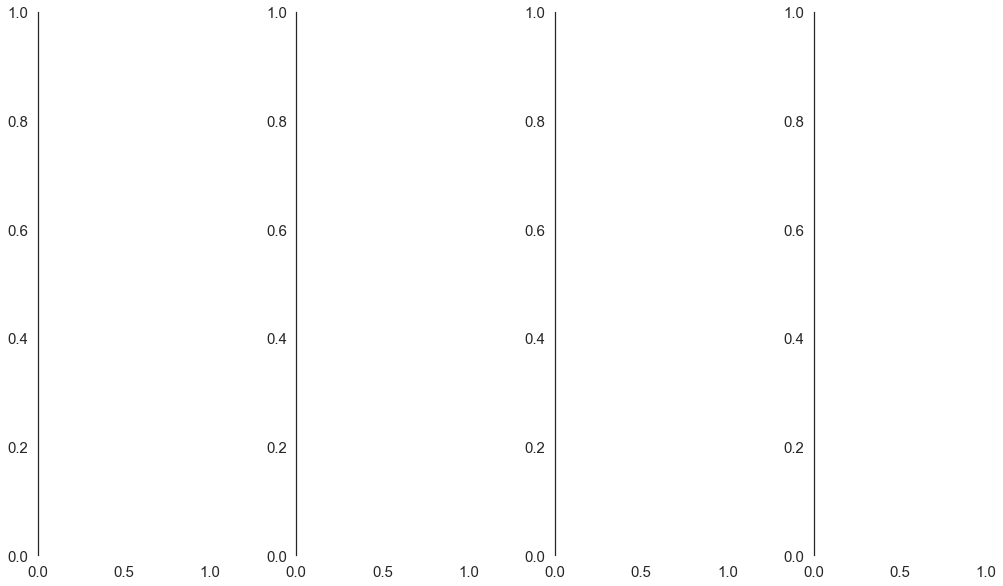

In [252]:
# 9ый вопрос в разрезе социального капитала

q9_sts = ['Дистанционные онлайн-занятия, которые организует школа',
         'Презентации и видеоуроки по рекомендации школы и учителя',
         'Платформы и сервисы для дистанционного обучения по рекомендации школы и учителя (например, Учи.ру)',
         'Письменные материалы и учебники по рекомендации школы и учителя',
         'Презентации и видеоуроки, которые Вы нашли в интернете самостоятельно',
         'Платформы и сервисы для дистанционного обучения, которые Вы нашли в интернете самостоятельно',
         'Письменные материалы и учебники, которые Вы нашли в интернете самостоятельно']

fig, axs = plt.subplots(1,4)
plt.rcParams['figure.figsize'] = [17, 10]
plt.subplots_adjust(wspace=0.5)
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)


cnt = 0
subtitle_cnt = 0 

for col in q9_data: 
    
    q9_dummies = pd.get_dummies(q9_data[col])
    q9_dummies['fin_situation'] = data_mom_edu.apply(FinSit_calssifier, axis=1)
    q9_dummies['q86mom_edu'] = data_mom_edu['q86mom_edu']

    g = sns.barplot(x="q86mom_edu", y=q9_dummies.columns[0],  
            capsize=.8,
            data=q9_dummies, ax=axs[cnt])
    g.set_xlabel('\n'.join(wrap(q9_dummies.columns[0],20)), fontsize=17, wrap=True)
    g.set_ylabel('Опрошенных',fontsize=15)
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))

    if cnt != 0:
        g.set_ylabel('')
        g.set_yticks([])

    if cnt <=2:
        cnt +=1
    else:
        cnt = 0
        fig.suptitle('\n'.join(wrap(q9_sts[subtitle_cnt],50)), fontsize = 20 )
        plt.savefig(q9_sts[subtitle_cnt] +"_соц.png",bbox_inches='tight')
        plt.clf()
        
        fig, axs = plt.subplots(1,4)

        plt.rcParams['figure.figsize'] = [17, 10]
        plt.subplots_adjust(wspace=0.5)
        sns.despine(left=False, bottom=True, right=True)
        rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
        sns.set(rc=rc, style="white", palette="tab10")
        plt.rcParams.update(**rc)
        subtitle_cnt += 1

       

<Figure size 1224x720 with 0 Axes>

<Figure size 1224x720 with 0 Axes>

<Figure size 1224x720 with 0 Axes>

<Figure size 1224x720 with 0 Axes>

<Figure size 1224x720 with 0 Axes>

<Figure size 1224x720 with 0 Axes>

<Figure size 1224x720 with 0 Axes>

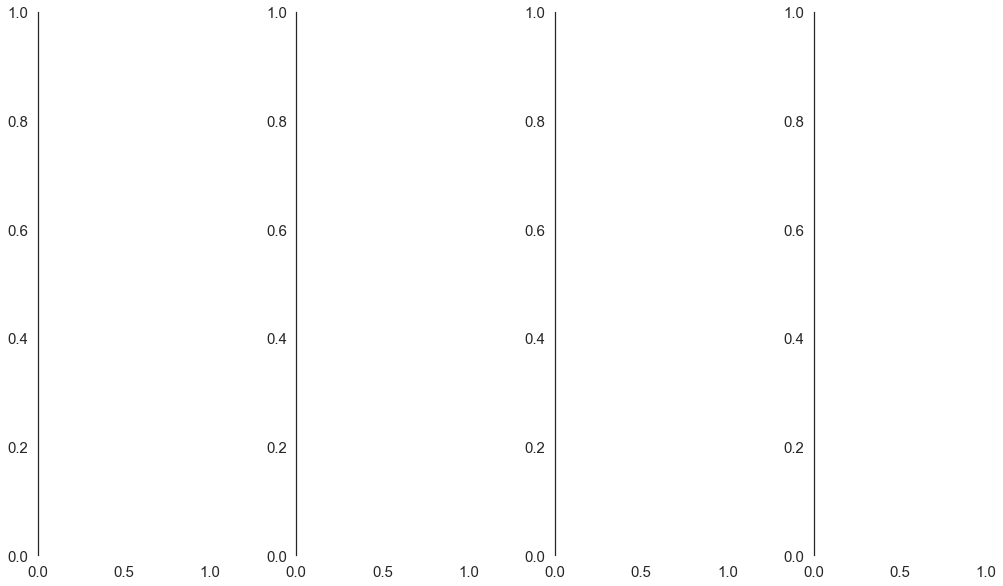

In [50]:
# 9ый вопрос в разрезе фин капитала

q9_sts = ['Дистанционные онлайн-занятия, которые организует школа',
         'Презентации и видеоуроки по рекомендации школы и учителя',
         'Платформы и сервисы для дистанционного обучения по рекомендации школы и учителя (например, Учи.ру)',
         'Письменные материалы и учебники по рекомендации школы и учителя',
         'Презентации и видеоуроки, которые Вы нашли в интернете самостоятельно',
         'Платформы и сервисы для дистанционного обучения, которые Вы нашли в интернете самостоятельно',
         'Письменные материалы и учебники, которые Вы нашли в интернете самостоятельно']

fig, axs = plt.subplots(1,4)
plt.rcParams['figure.figsize'] = [17, 10]
plt.subplots_adjust(wspace=0.5)
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)


cnt = 0
subtitle_cnt = 0 

for col in q9_data: 
    
    q9_dummies = pd.get_dummies(q9_data[col])
    q9_dummies['fin_situation'] = data_mom_edu.apply(FinSit_calssifier, axis=1)
    q9_dummies['q86mom_edu'] = data_mom_edu['q86mom_edu']

    g = sns.barplot(x="fin_situation", y=q9_dummies.columns[0],  
            capsize=.8,
            data=q9_dummies, ax=axs[cnt])
    g.set_xlabel('\n'.join(wrap(q9_dummies.columns[0],20)), fontsize=17, wrap=True)
    g.set_ylabel('Опрошенных',fontsize=15)
    labels = ['Средний класс', 'Выше среднего']
    labels = [ '\n'.join(wrap(l,10)) for l in labels ]
    g.set_xticklabels(labels) 
    
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))

    if cnt != 0:
        g.set_ylabel('')
        g.set_yticks([])

    if cnt <=2:
        cnt +=1
    else:
        cnt = 0
        fig.suptitle('\n'.join(wrap(q9_sts[subtitle_cnt],50)), fontsize = 20 )
        plt.savefig(q9_sts[subtitle_cnt] +"_фин.png",bbox_inches='tight')
        plt.clf()
        
        fig, axs = plt.subplots(1,4)

        plt.rcParams['figure.figsize'] = [17, 10]
        plt.subplots_adjust(wspace=0.5)
        sns.despine(left=False, bottom=True, right=True)
        rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
        sns.set(rc=rc, style="white", palette="tab10")
        plt.rcParams.update(**rc)
        subtitle_cnt += 1

In [39]:
q9_data.head(2)

,q9online_classes_for_edu,q9online_classes_to_test,q9online_classes_for_additional_edu,q9online_classes_didnt_use,q9presentations_school_for_edu,q9presentations_school_to_test,q9presentations_school_for_additional_edu,q9presentations_school_didnt_use,q9platforms_school_for_edu,q9platforms_school_to_test,q9platforms_school_for_add_edu,q9platforms_school_didnt_use,q9books_school_for_edu,q9books_school_to_test,q9books_school_for_add_edu,q9books_school_didnt_use,q9presentations_found_for_edu,q9presentations_found_to_test,q9presentations_found_for_add_edu,q9presentations_found_didnt_use,q9platforms_found_for_edu,q9platforms_found_to_test,q9platforms_found_for_add_edu,q9platforms_found_didnt_use,q9books_found_for_edu,q9books_found_to_test,q9books_found_for_add_edu,q9books_found_didnt_use
2,"Для основной учебы (то, что ребенок проходит п...",Для тестирования и оценки уровня знаний ребенка,"Для дополнительного образования (то, что не вк...",Пропустили вопрос,"Для основной учебы (то, что ребенок проходит п...",Для тестирования и оценки уровня знаний ребенка,"Для дополнительного образования (то, что не вк...",Пропустили вопрос,"Для основной учебы (то, что ребенок проходит п...",Для тестирования и оценки уровня знаний ребенка,Пропустили вопрос,Пропустили вопрос,"Для основной учебы (то, что ребенок проходит п...",Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,"Для дополнительного образования (то, что не вк...",Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,"Для дополнительного образования (то, что не вк...",Пропустили вопрос
3,"Для основной учебы (то, что ребенок проходит п...",Пропустили вопрос,"Для дополнительного образования (то, что не вк...",Пропустили вопрос,"Для основной учебы (то, что ребенок проходит п...",Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Для тестирования и оценки уровня знаний ребенка,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,"Для дополнительного образования (то, что не вк...",Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Не использовали,Пропустили вопрос,Для тестирования и оценки уровня знаний ребенка,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Не использовали


In [ ]:
chi2_estimator()

In [56]:
list_degf2 = []
list_chi2 = []
list_pval2 = []
list_answ = []
for col in q9_data:
    cnt +=1 
    q9_dummies = pd.get_dummies(q9_data[col])
    q9_dummies['fin_situation'] = data_mom_edu.apply(FinSit_calssifier, axis=1)
    q9_dummies['q86mom_edu'] = data_mom_edu['q86mom_edu']
    chi2_estimator(q9_dummies,'q86mom_edu',q9_dummies.columns[0],list_degf2,list_chi2,list_pval2)
    list_answ.append(q9_dummies.columns[0])

contingency_table :
 Для основной учебы (то, что ребенок проходит по школьной программе)    0     1
q86mom_edu                                                                    
Без высшего                                                           28   201
Высшее                                                               127  1060
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.46
critical_value: 3.84
p-value: 0.5
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
contingency_table :
 Для тестирования и оценки уровня знаний ребенка    0    1
q86mom_edu                                               
Без высшего                                      125  104
Высшее                                           561  626
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 4.12
critical_value: 3.84
p-value: 0.04
Reject H0,There is a relationship between 2 categorical v

contingency_table :
 Не использовали     0    1
q86mom_edu                
Без высшего       207   22
Высшее           1085  102
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.25
critical_value: 3.84
p-value: 0.62
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
contingency_table :
 Для основной учебы (то, что ребенок проходит по школьной программе)    0    1
q86mom_edu                                                                   
Без высшего                                                          115  114
Высшее                                                               638  549
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.96
critical_value: 3.84
p-value: 0.33
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
contingency_table :
 Для тестирования и оценки уро

In [57]:
list_qw = ['Дистанционные онлайн-занятия, которые организуетшкола',
             'Дистанционные онлайн-занятия, которые организуетшкола',
             'Дистанционные онлайн-занятия, которые организуетшкола',
             'Дистанционные онлайн-занятия, которые организуетшкола',
            'Презентации и видеоуроки по рекомендации школы и учителя',
             'Презентации и видеоуроки по рекомендации школы и учителя',
             'Презентации и видеоуроки по рекомендации школы и учителя',
             'Презентации и видеоуроки по рекомендации школы и учителя',
             'Платформы и сервисы для дистанционного обучения по рекомендации школы и учителя (например, Учи.ру)',
             'Платформы и сервисы для дистанционного обучения по рекомендации школы и учителя (например, Учи.ру)',
             'Платформы и сервисы для дистанционного обучения по рекомендации школы и учителя (например, Учи.ру)',
             'Платформы и сервисы для дистанционного обучения по рекомендации школы и учителя (например, Учи.ру)',
             'Письменные материалы и учебники по рекомендации школы и учителя',
             'Письменные материалы и учебники по рекомендации школы и учителя',
             'Письменные материалы и учебники по рекомендации школы и учителя',
             'Письменные материалы и учебники по рекомендации школы и учителя',
             'Презентации и видеоуроки, которые Вы нашли в интернете самостоятельно',
             'Презентации и видеоуроки, которые Вы нашли в интернете самостоятельно',
             'Презентации и видеоуроки, которые Вы нашли в интернете самостоятельно',
             'Презентации и видеоуроки, которые Вы нашли в интернете самостоятельно',
             'Платформы и сервисы для дистанционного обучения, которые Вы нашли в интернете самостоятельно',
             'Платформы и сервисы для дистанционного обучения, которые Вы нашли в интернете самостоятельно',
             'Платформы и сервисы для дистанционного обучения, которые Вы нашли в интернете самостоятельно',
             'Платформы и сервисы для дистанционного обучения, которые Вы нашли в интернете самостоятельно',
             'Письменные материалы и учебники, которые Вы нашли в интернете самостоятельно',
             'Письменные материалы и учебники, которые Вы нашли в интернете самостоятельно',
             'Письменные материалы и учебники, которые Вы нашли в интернете самостоятельно',
             'Письменные материалы и учебники, которые Вы нашли в интернете самостоятельно']
dict_val2 = {'Вопрос':list_qw,
            'Утверждения': list_answ,
            'Степеней свободы': list_degf2,
            'Хи-квадрат':list_chi2,
            'p-уровень значимости':list_pval2
           }
hypo_testing2 = pd.DataFrame(dict_val2)

### Пункт 4

38. Не считая уроков в данной школе, занимался ли Ваш ребенок в этом учебном году в каких-либо секциях, на
курсах и т.п.? Выберите все подходящие варианты ответов

In [76]:
# 38 вопрос в разрезе социального капитала 

q38_data = data_mom_edu.loc[:,'q38sport':'q38no']
q38_col_name = ['Спорт',
                'Иностранные языки',
                'Танцы, музыка, театр, изобразительные искусств',
                'Научно-технические кружки',
                'Подготовка к поступлению в вуз или дополнительные занятия по школьным предметам',
                'Другое',
                'Не занимался']

plt.rcParams['figure.figsize'] = [10, 9]
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)

cnt=0
for col in q38_data:
    q38_dummies = pd.get_dummies(q38_data[col])
    q38_dummies['fin_situation'] = data_mom_edu.apply(FinSit_calssifier, axis=1)
    q38_dummies['q86mom_edu'] = data_mom_edu['q86mom_edu']
    g = sns.barplot(x="q86mom_edu", y=q38_dummies[q38_col_name[cnt]],order=['Высшее','Без высшего'], 
            capsize=.8,
            data=q38_dummies)
    
    g.set_xlabel('\n'.join(wrap(q38_col_name[cnt],60)), fontsize=17, wrap=True)
    
    g.set_ylabel('Опрошенных',fontsize=15)
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))
    plt.savefig(str(cnt)+ '_соц_' + q38_col_name[cnt] +".png",bbox_inches='tight')
    plt.clf()
    cnt +=1 

<Figure size 720x648 with 0 Axes>

In [75]:
# 38 вопрос в разрезе финансого капитала 

q38_data = data_mom_edu.loc[:,'q38sport':'q38no']
q38_col_name = ['Спорт',
                'Иностранные языки',
                'Танцы, музыка, театр, изобразительные искусств',
                'Научно-технические кружки',
                'Подготовка к поступлению в вуз или дополнительные занятия по школьным предметам',
                'Другое',
                'Не занимался']

plt.rcParams['figure.figsize'] = [10, 9]
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)

cnt=0
for col in q38_data:
    q38_dummies = pd.get_dummies(q38_data[col])
    q38_dummies['fin_situation'] = data_mom_edu.apply(FinSit_calssifier, axis=1)
    q38_dummies['q86mom_edu'] = data_mom_edu['q86mom_edu']
    g = sns.barplot(x="fin_situation", y=q38_dummies[q38_col_name[cnt]],order=['Выше среднего','Средний класс'], 
            capsize=.8,
            data=q38_dummies)
    
    g.set_xlabel('\n'.join(wrap(q38_col_name[cnt],60)), fontsize=17, wrap=True)
    
    g.set_ylabel('Опрошенных',fontsize=15)
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))
    plt.savefig(str(cnt)+ '_фин_' + q38_col_name[cnt] +".png",bbox_inches='tight')
    plt.clf()
    cnt +=1 

<Figure size 720x648 with 0 Axes>

39. В каком формате Ваш ребёнок занимается дополнительно сейчас? Выберите все подходящие варианты
ответа

In [89]:
data_mom_edu['q39_1'].value_counts()

Пропустили вопрос                                        756
Работает с преподавателемпреподавателями дистанционно    660
Name: q39_1, dtype: int64

In [91]:
# 39 вопрос в разрезе финансого капитала 

q39_data = data_mom_edu.loc[:,'q39_1':'q39no']
q39_col_name = ['Работает с преподавателемпреподавателями дистанционно',
               'Занимается с преподавателем\преподавателями очно (не дистанционно)',
               'Занимается с родителями',
               'Занимается самостоятельно',
               'Другое',
               'Не занимается']


plt.rcParams['figure.figsize'] = [10, 9]
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)

cnt=0
for col in q39_data:
    q39_dummies = pd.get_dummies(q39_data[col])
    q39_dummies['fin_situation'] = data_mom_edu.apply(FinSit_calssifier, axis=1)
    q39_dummies['q86mom_edu'] = data_mom_edu['q86mom_edu']
    g = sns.barplot(x="fin_situation", y=q39_dummies[q39_col_name[cnt]],order=['Выше среднего','Средний класс'], 
            capsize=.8,
            data=q39_dummies)
    
    g.set_xlabel('\n'.join(wrap(q39_col_name[cnt],60)), fontsize=17, wrap=True)
    
    g.set_ylabel('Опрошенных',fontsize=15)
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))
    plt.savefig(str(cnt)+ '_фин_' + ".png",bbox_inches='tight')
    plt.clf()
    cnt +=1 

<Figure size 720x648 with 0 Axes>

In [92]:
# 39 вопрос в разрезе социального капитала 

q39_data = data_mom_edu.loc[:,'q39_1':'q39no']
q39_col_name = ['Работает с преподавателемпреподавателями дистанционно',
               'Занимается с преподавателем\преподавателями очно (не дистанционно)',
               'Занимается с родителями',
               'Занимается самостоятельно',
               'Другое',
               'Не занимается']


plt.rcParams['figure.figsize'] = [10, 9]
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)

cnt=0
for col in q39_data:
    q39_dummies = pd.get_dummies(q39_data[col])
    q39_dummies['fin_situation'] = data_mom_edu.apply(FinSit_calssifier, axis=1)
    q39_dummies['q86mom_edu'] = data_mom_edu['q86mom_edu']
    g = sns.barplot(x="q86mom_edu", y=q39_dummies[q39_col_name[cnt]],order=['Высшее','Без высшего'], 
            capsize=.8,
            data=q39_dummies)
    
    g.set_xlabel('\n'.join(wrap(q39_col_name[cnt],60)), fontsize=17, wrap=True)
    
    g.set_ylabel('Опрошенных',fontsize=15)
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))
    plt.savefig(str(cnt)+ '_соц_' + ".png",bbox_inches='tight')
    plt.clf()
    cnt +=1 

<Figure size 720x648 with 0 Axes>

### Пункт 5 Практики подготовки к  ЕГЭ в разрезе образования родителей (вопрос 40-41)

In [62]:
pd.set_option('display.max_columns', None) #show all columns 
data.head(2)

,Unnamed: 0,Response.ID,Time.Started,Date.Submitted,Status,IP.Address,Longitude,Latitude,Country,City,State.Region,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade_oldest,grade_preschool,grade_endedschool,birthyear,school,school_rec,gender,q5,q6,q7,q7other,q7other2,q8,q9online_classes_for_edu,q9online_classes_to_test,q9online_classes_for_additional_edu,q9online_classes_didnt_use,q9presentations_school_for_edu,q9presentations_school_to_test,q9presentations_school_for_additional_edu,q9presentations_school_didnt_use,q9platforms_school_for_edu,q9platforms_school_to_test,q9platforms_school_for_add_edu,q9platforms_school_didnt_use,q9books_school_for_edu,q9books_school_to_test,q9books_school_for_add_edu,q9books_school_didnt_use,q9presentations_found_for_edu,q9presentations_found_to_test,q9presentations_found_for_add_edu,q9presentations_found_didnt_use,q9platforms_found_for_edu,q9platforms_found_to_test,q9platforms_found_for_add_edu,q9platforms_found_didnt_use,q9books_found_for_edu,q9books_found_to_test,q9books_found_for_add_edu,q9books_found_didnt_use,q9other_found_for_edu,q9other_found_to_test,q9other_found_for_add_edu,q9other_found_didnt_use,q10control_homework,q10interesting,q10help,q10talk,q10plans,q10friends,q10explain,q10help_homework,q10platforms,q10dop,q11control_homework,q11interesting,q11help,q11talk,q11plans,q11friends,q11explain,q11help_homework,q11platforms,q11dop,q11movies,q11books,q12googleclassroom,q12mesh,q12yandex_uch,q12yandex_sch,q12ya_class,q12uchi,q12internet_urok,q12meo,q12other,q12no,q12other2,q12other3,q13googleclassroom,q13mesh,q13yandex_uch,q13yandex_sch,q13ya_class,q13uchi,q13internet_urok,q13meo,q13other,q13no,q13other2,q13other3,q14,q15mom,q15stepmom,q15dad,q15stepdad,q15grandma,q15grandpa,q15bro_sis,q15nanny,q15other_relatives,q15other,q15nobody,q15other_relatives_text,q15other_text,q15other_rel_text2,q15other_text2,q16play,q16help,q16control,q16clean,q17play,q17help,q17control,q17clean,q18,q18other1,q18other2,q19,q20h,q20min,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,q31teach,q31org,q31support,q31therapy,q31other1,q31other2,q31other3,q32,q33_1,q33_2,q33_3,q33_4,q33_5,q33_6,q33_7,q33_8,q33_9,q33_10,q34_1,q34_2,q34_3,q34_4,q34_5,q34_6,q34_7,q34_8,q34_9,q34_10,q34_11,q34_12,q34other1,q34other2,q34other3,q35_1,q35_2,q35_3,q35_4,q35_5,q35_6,q36_1,q36_2,q36_3,q36_4,q36_5,q36_6,q36_7,q37,q38sport,q38lang,q38art,q38science,q38vuz,q38other,q38no,q38other2,q38other3,q39_1,q39_2,q39_3,q39_4,q39other,q39no,q39other2,q40,q41_1,q41_2,q41_3,q41_4,q41_5,q41_6,q42_1,q42_2,q42_3,q42other,q42no,q42other2,q42other3,q43_1,q43_2,q43_3,q43_4,q43_5,q43_6,q43_7,q43_8,q43_9,q43_10,q44_1,q44_2,q44_3,q44_4,q44_5,q44_6,q44_7,q44_8,q44_9,q44_10,q44_11,q44_12,q44_13,q44_14,q44_15,q44_16,q44_17,q45_1,q45_2,q45_3,q45_4,q.O,qДр,qДр_1,qДр_2,q46_1,q46_2,q46_3,q46_4,q46_5,q46_6,q46_7,q46other1,q46other2,q47,q48,q49,q50,q51,q52,q53_1,q53_2,q53_3,q53other1,q53other2,q53other3,q54,q55,q55_2,q56h,q56min,q57_1,q57_2,q57_3,q57_4,q57_5,q58,q59,q60,q61_1,q61_2,q61_3,q61_4,q61_5,q61_6,q62,q63,q64,q65,q66,q67,q67_other_rel,q67_other,q68birthyear_mom,q68birthyear_dad,q69mom,q69stepmom,q69dad,q69stepdad,q69bro,q69sis,q69grandma,q69grandpa,q69other_rel,q69other,q69other_rel_text,q69other_text,q70,q71,q72,q73,q73other,q74,q75h,q75min,q76,q76other,q77,q78,q79,q80,q80other,q81,q82hour,q82min,q83,q83other,q84,q85,q86mom_edu,q86dad_edu,q87room,q88auto,q89income,q90month,q90name,q90letter,na_count
0,1,30,30.04.2020 17:29,30.04.2020 17:32,Partial,176.59.103.99,44.0019,56.3283,Russian Federation,Nizhniy Novgorod,51,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,7 класс,8 класс,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,2005.0,2110,2110,Мужской,"Да, школа сейчас закрыта, дети на дистанционно...",Пропустили вопрос,Очно,Пропустили вопрос,Пропустили вопрос,Месяц,Пропустили вопрос,Пропустили вопрос,"Для допо

In [51]:
q4041_data = data_mom_edu.loc[:,'q40':'q41_6']
q4041_data_filtered = q4041_data[(q4041_data['q40'] == 'Да') &(q4041_data['q41_1'] != 'Пропустили вопрос') | (q4041_data['q41_2'] != 'Пропустили вопрос') |
                           (q4041_data['q41_3'] != 'Пропустили вопрос') | (q4041_data['q41_4'] != 'Пропустили вопрос') |
                          (q4041_data['q41_5'] != 'Пропустили вопрос') | (q4041_data['q41_6'] != 'Пропустили вопрос')]

In [32]:
q40_data = pd.get_dummies(data_mom_edu.q40)
q40_data['fin_situation'] = data_mom_edu.apply(FinSit_calssifier, axis=1)
q40_data['q86mom_edu'] = data_mom_edu['q86mom_edu']

IndexError: index 2 is out of bounds for axis 0 with size 2

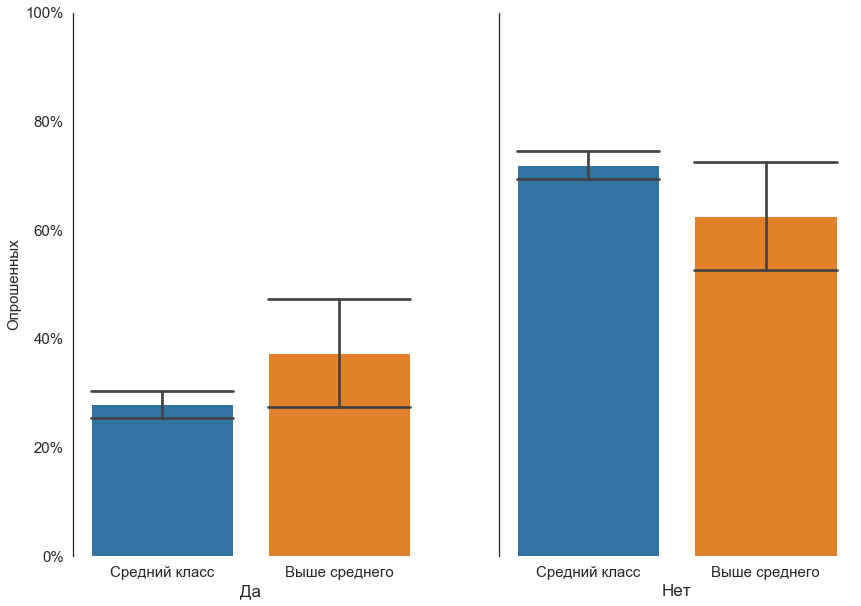

In [56]:
# Вопрос 40 в разрезе финансого состояния 
fig, axs = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [14, 10]
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)


cnt = 0
sns.set_style("white")
for col in q40_data:
    g = sns.barplot(x="fin_situation", y=col,
            capsize=.8,
            data=q40_data, ax=axs[cnt])
    g.set_xlabel('\n'.join(wrap(col,20)), fontsize=17, wrap=True)
    g.set_ylabel('Опрошенных',fontsize=15)
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))

    
    if cnt != 0:
        g.set_ylabel('')
        g.set_yticks([])
    cnt +=1
    plt.savefig(col + "_фин.png",bbox_inches='tight')


IndexError: index 2 is out of bounds for axis 0 with size 2

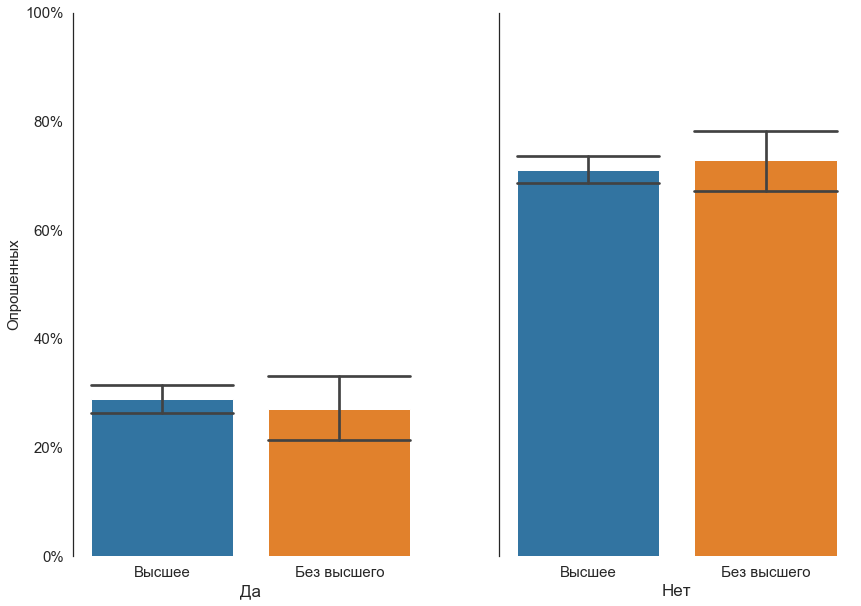

In [348]:
# Вопрос 40 в разрезе социального капитала  

fig, axs = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [14, 10]
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)


cnt = 0
sns.set_style("white")
for col in q40_data:
    g = sns.barplot(x="q86mom_edu", y=col,
            capsize=.8,
            data=q40_data, ax=axs[cnt])
    g.set_xlabel('\n'.join(wrap(col,20)), fontsize=17, wrap=True)
    g.set_ylabel('Опрошенных',fontsize=15)
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))

    
    if cnt != 0:
        g.set_ylabel('')
        g.set_yticks([])
    cnt +=1
    plt.savefig(col + "_соц.png",bbox_inches='tight')

In [53]:
q4041_data_filtered

,q40,q41_1,q41_2,q41_3,q41_4,q41_5,q41_6
2,Да,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Самостоятельно занимается по дополнительным ма...
3,Да,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Изучает платформы и сервисы для дополнительног...,Самостоятельно занимается по дополнительным ма...
10,Да,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Самостоятельно занимается по дополнительным ма...
13,Да,Пропустили вопрос,Пропустили вопрос,Занимается с репетитором индивидуально,Пропустили вопрос,Изучает платформы и сервисы для дополнительног...,Самостоятельно занимается по дополнительным ма...
16,Да,Пропустили вопрос,Пропустили вопрос,Занимается с репетитором индивидуально,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос
...,...,...,...,...,...,...,...
2529,Да,Пропустили вопрос,Пропустили вопрос,Занимается с репетитором индивидуально,Пропустили вопрос,Пропустили вопрос,Самостоятельно занимается по дополнительным ма...
2551,Да,Пропустили вопрос,Пропустили вопрос,Занимается с репетитором индивидуально,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос
2556,Да,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Изучает платформы и сервисы для дополнительног...,Самостоятельно занимается по дополнительным ма...
2560,Да,Пропустили вопрос,Пропустили вопрос,Занимается с репетитором индивидуально,Пропустили вопрос,Изучает платформы и сервисы для дополнительног...,Пропустили вопрос


In [56]:
q4041_data = data_mom_edu.loc[:,'q40':'q41_6']
q4041_data_filtered = q4041_data[(q4041_data['q40'] == 'Да') &(q4041_data['q41_1'] != 'Пропустили вопрос') | (q4041_data['q41_2'] != 'Пропустили вопрос') |
                           (q4041_data['q41_3'] != 'Пропустили вопрос') | (q4041_data['q41_4'] != 'Пропустили вопрос') |
                          (q4041_data['q41_5'] != 'Пропустили вопрос') | (q4041_data['q41_6'] != 'Пропустили вопрос')]

In [55]:
# 41 вопрос в разрезе финансого капитала

plt.rcParams['figure.figsize'] = [10, 9]
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)

q41_col_name = ['Занимается дополнительно со школьным учителем индивидуально',
           'Занимается дополнительно со школьным учителем в группе',
           'Занимается с репетитором индивидуально',
           'Занимается с репетитором в группе (курсы, кружки)',
           'Изучает платформы и сервисы для дополнительного образования или подготовки к ЕГЭ в Интернете',
           'Самостоятельно занимается по дополнительным материалам (учебниками, сборникам задач и т.д.)']

q41_data = q4041_data_filtered.loc[:,'q41_1':'q41_6']
q41_data_filtrd = q41_data[(q41_data['q41_1'] != 'Пропустили вопрос') | (q41_data['q41_2'] != 'Пропустили вопрос') |
                           (q41_data['q41_3'] != 'Пропустили вопрос') | (q41_data['q41_4'] != 'Пропустили вопрос') |
                          (q41_data['q41_5'] != 'Пропустили вопрос') | (q41_data['q41_6'] != 'Пропустили вопрос')]


cnt=0
for col in q41_data_filtrd:
    q41_dummies = pd.get_dummies(q41_data_filtrd[col])
    q41_dummies['fin_situation'] = data_mom_edu.apply(FinSit_calssifier, axis=1)
    q41_dummies['q86mom_edu'] = data_mom_edu['q86mom_edu']
    g = sns.barplot(x="fin_situation", y=q41_dummies[q41_col_name[cnt]],order=['Выше среднего','Средний класс'], 
            capsize=.8,
            data=q41_dummies)
    
    g.set_xlabel('\n'.join(wrap(q41_col_name[cnt],60)), fontsize=17, wrap=True)
    
    g.set_ylabel('Опрошенных',fontsize=15)
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))
    plt.savefig(str(cnt)+ '_фин_' + q41_col_name[cnt] +".png",bbox_inches='tight')
    plt.clf()
    cnt +=1 

<Figure size 720x648 with 0 Axes>

In [58]:
# 41 вопрос в разрезе социального капитала
q41_data = data_mom_edu.loc[:,'q41_1':'q41_6']

plt.rcParams['figure.figsize'] = [10, 9]
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)

q41_col_name = ['Занимается дополнительно со школьным учителем индивидуально',
           'Занимается дополнительно со школьным учителем в группе',
           'Занимается с репетитором индивидуально',
           'Занимается с репетитором в группе (курсы, кружки)',
           'Изучает платформы и сервисы для дополнительного образования или подготовки к ЕГЭ в Интернете',
           'Самостоятельно занимается по дополнительным материалам (учебниками, сборникам задач и т.д.)']

q41_data = q4041_data_filtered.loc[:,'q41_1':'q41_6']
q41_data_filtrd = q41_data[(q41_data['q41_1'] != 'Пропустили вопрос') | (q41_data['q41_2'] != 'Пропустили вопрос') |
                           (q41_data['q41_3'] != 'Пропустили вопрос') | (q41_data['q41_4'] != 'Пропустили вопрос') |
                          (q41_data['q41_5'] != 'Пропустили вопрос') | (q41_data['q41_6'] != 'Пропустили вопрос')]


cnt=0
for col in q41_data_filtrd:
    q41_dummies = pd.get_dummies(q41_data_filtrd[col])
    q41_dummies['fin_situation'] = data_mom_edu.apply(FinSit_calssifier, axis=1)
    q41_dummies['q86mom_edu'] = data_mom_edu['q86mom_edu']
    g = sns.barplot(x="q86mom_edu", y=q41_dummies[q41_col_name[cnt]],  
            capsize=.8,
            data=q41_dummies)
    
    g.set_xlabel('\n'.join(wrap(q41_col_name[cnt],60)), fontsize=17, wrap=True)
    
    g.set_ylabel('Опрошенных',fontsize=15)
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))
    plt.savefig(str(cnt)+ '_соц_' + q41_col_name[cnt] +".png",bbox_inches='tight')
    plt.clf()
    cnt +=1 

<Figure size 720x648 with 0 Axes>

### Пункт 6. Следите ли Вы после перехода на дистанционное обучение за тем, чтобы ребенок делал вовремя следующее? Выберите все подходящие варианты ответа (Вопрос 43)

In [73]:
q43_data = data_mom_edu.loc[:,'q43_1':'q43_7']

In [77]:
q43_data['q43_7'].value_counts()

Пропустили вопрос       1353
Я не слежу ни за чем      63
Name: q43_7, dtype: int64

In [82]:
# 43 вопрос в разрезе финансого капитала

plt.rcParams['figure.figsize'] = [10, 9]
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)

q43_col_name = ['Ел',
               'Ложился спать',
               'Был на уроках или дополнительных занятиях',
               'Делал домашнюю работу',
               'Чистил зубы, соблюдал гигиену',
               'Я слежу за соблюдением всего режима дня',
               'Я не слежу ни за чем']
cnt = 0
for col in q43_data:

    q43_dummies = pd.get_dummies(q43_data[col])
    q43_dummies['fin_situation'] = data_mom_edu.apply(FinSit_calssifier, axis=1)
    q43_dummies['q86mom_edu'] = data_mom_edu['q86mom_edu']
    g = sns.barplot(x="fin_situation", y=q43_dummies[q43_col_name[cnt]],
            order=['Выше среднего', 'Средний класс'],
            capsize=.8,
            data=q43_dummies)
    
    g.set_xlabel('\n'.join(wrap(q43_col_name[cnt],60)), fontsize=17, wrap=True)
    g.set_ylabel('Опрошенных',fontsize=15)
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))
    plt.savefig(str(cnt)+ '_фин_' + q43_col_name[cnt] +".png",bbox_inches='tight')
    plt.clf()
    cnt +=1

<Figure size 720x648 with 0 Axes>

In [83]:
# 43 вопрос в разрезе социального капитала

plt.rcParams['figure.figsize'] = [10, 9]
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)

q43_col_name = ['Ел',
               'Ложился спать',
               'Был на уроках или дополнительных занятиях',
               'Делал домашнюю работу',
               'Чистил зубы, соблюдал гигиену',
               'Я слежу за соблюдением всего режима дня',
               'Я не слежу ни за чем']
cnt = 0
for col in q43_data:

    q43_dummies = pd.get_dummies(q43_data[col])
    q43_dummies['fin_situation'] = data_mom_edu.apply(FinSit_calssifier, axis=1)
    q43_dummies['q86mom_edu'] = data_mom_edu['q86mom_edu']
    g = sns.barplot(x="q86mom_edu", y=q43_dummies[q43_col_name[cnt]],
            order=['Высшее', 'Без высшего'],
            capsize=.8,
            data=q43_dummies)
    
    g.set_xlabel('\n'.join(wrap(q43_col_name[cnt],60)), fontsize=17, wrap=True)
    g.set_ylabel('Опрошенных',fontsize=15)
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))
    plt.savefig(str(cnt)+ '_соц_' + q43_col_name[cnt] +".png",bbox_inches='tight')
    plt.clf()
    cnt +=1

<Figure size 720x648 with 0 Axes>

### Пункт 7 Проблемы с помощью в дистанционном обучении - какие семьи в большей степени с ними столкнулись (32, 34)


 ### 32. Насколько Вам легко или сложно помогать ребенку по школьной программе (объяснить какую-то тему, сделать с ним присланные задания и т.д.)?

In [349]:
pd.set_option('display.max_columns', None) #show all columns 
data.head(2)

,Unnamed: 0,Response.ID,Time.Started,Date.Submitted,Status,IP.Address,Longitude,Latitude,Country,City,State.Region,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade_oldest,grade_preschool,grade_endedschool,birthyear,school,school_rec,gender,q5,q6,q7,q7other,q7other2,q8,q9online_classes_for_edu,q9online_classes_to_test,q9online_classes_for_additional_edu,q9online_classes_didnt_use,q9presentations_school_for_edu,q9presentations_school_to_test,q9presentations_school_for_additional_edu,q9presentations_school_didnt_use,q9platforms_school_for_edu,q9platforms_school_to_test,q9platforms_school_for_add_edu,q9platforms_school_didnt_use,q9books_school_for_edu,q9books_school_to_test,q9books_school_for_add_edu,q9books_school_didnt_use,q9presentations_found_for_edu,q9presentations_found_to_test,q9presentations_found_for_add_edu,q9presentations_found_didnt_use,q9platforms_found_for_edu,q9platforms_found_to_test,q9platforms_found_for_add_edu,q9platforms_found_didnt_use,q9books_found_for_edu,q9books_found_to_test,q9books_found_for_add_edu,q9books_found_didnt_use,q9other_found_for_edu,q9other_found_to_test,q9other_found_for_add_edu,q9other_found_didnt_use,q10control_homework,q10interesting,q10help,q10talk,q10plans,q10friends,q10explain,q10help_homework,q10platforms,q10dop,q11control_homework,q11interesting,q11help,q11talk,q11plans,q11friends,q11explain,q11help_homework,q11platforms,q11dop,q11movies,q11books,q12googleclassroom,q12mesh,q12yandex_uch,q12yandex_sch,q12ya_class,q12uchi,q12internet_urok,q12meo,q12other,q12no,q12other2,q12other3,q13googleclassroom,q13mesh,q13yandex_uch,q13yandex_sch,q13ya_class,q13uchi,q13internet_urok,q13meo,q13other,q13no,q13other2,q13other3,q14,q15mom,q15stepmom,q15dad,q15stepdad,q15grandma,q15grandpa,q15bro_sis,q15nanny,q15other_relatives,q15other,q15nobody,q15other_relatives_text,q15other_text,q15other_rel_text2,q15other_text2,q16play,q16help,q16control,q16clean,q17play,q17help,q17control,q17clean,q18,q18other1,q18other2,q19,q20h,q20min,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,q31teach,q31org,q31support,q31therapy,q31other1,q31other2,q31other3,q32,q33_1,q33_2,q33_3,q33_4,q33_5,q33_6,q33_7,q33_8,q33_9,q33_10,q34_1,q34_2,q34_3,q34_4,q34_5,q34_6,q34_7,q34_8,q34_9,q34_10,q34_11,q34_12,q34other1,q34other2,q34other3,q35_1,q35_2,q35_3,q35_4,q35_5,q35_6,q36_1,q36_2,q36_3,q36_4,q36_5,q36_6,q36_7,q37,q38sport,q38lang,q38art,q38science,q38vuz,q38other,q38no,q38other2,q38other3,q39_1,q39_2,q39_3,q39_4,q39other,q39no,q39other2,q40,q41_1,q41_2,q41_3,q41_4,q41_5,q41_6,q42_1,q42_2,q42_3,q42other,q42no,q42other2,q42other3,q43_1,q43_2,q43_3,q43_4,q43_5,q43_6,q43_7,q43_8,q43_9,q43_10,q44_1,q44_2,q44_3,q44_4,q44_5,q44_6,q44_7,q44_8,q44_9,q44_10,q44_11,q44_12,q44_13,q44_14,q44_15,q44_16,q44_17,q45_1,q45_2,q45_3,q45_4,q.O,qДр,qДр_1,qДр_2,q46_1,q46_2,q46_3,q46_4,q46_5,q46_6,q46_7,q46other1,q46other2,q47,q48,q49,q50,q51,q52,q53_1,q53_2,q53_3,q53other1,q53other2,q53other3,q54,q55,q55_2,q56h,q56min,q57_1,q57_2,q57_3,q57_4,q57_5,q58,q59,q60,q61_1,q61_2,q61_3,q61_4,q61_5,q61_6,q62,q63,q64,q65,q66,q67,q67_other_rel,q67_other,q68birthyear_mom,q68birthyear_dad,q69mom,q69stepmom,q69dad,q69stepdad,q69bro,q69sis,q69grandma,q69grandpa,q69other_rel,q69other,q69other_rel_text,q69other_text,q70,q71,q72,q73,q73other,q74,q75h,q75min,q76,q76other,q77,q78,q79,q80,q80other,q81,q82hour,q82min,q83,q83other,q84,q85,q86mom_edu,q86dad_edu,q87room,q88auto,q89income,q90month,q90name,q90letter,na_count
0,1,30,30.04.2020 17:29,30.04.2020 17:32,Partial,176.59.103.99,44.0019,56.3283,Russian Federation,Nizhniy Novgorod,51,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,7 класс,8 класс,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,2005.0,2110,2110,Мужской,"Да, школа сейчас закрыта, дети на дистанционно...",Пропустили вопрос,Очно,Пропустили вопрос,Пропустили вопрос,Месяц,Пропустили вопрос,Пропустили вопрос,"Для допо

In [103]:
q32_data_filtered = data_mom_edu[(data_mom_edu['q14'] == 'Менее 1 часа в день') | 
                                 (data_mom_edu['q14'] == '1-2 часа каждый день') |
                                 (data_mom_edu['q14'] == '3 и более часов в день')]
q32_data = pd.get_dummies(q32_data_filtered.q32)
q32_data['fin_situation'] = q32_data_filtered.apply(FinSit_calssifier, axis=1)
q32_data['q86mom_edu'] = q32_data_filtered['q86mom_edu']

In [108]:
q32_data['Пропустили вопрос'].value_counts()

0    997
1     48
Name: Пропустили вопрос, dtype: int64

IndexError: index 5 is out of bounds for axis 0 with size 5

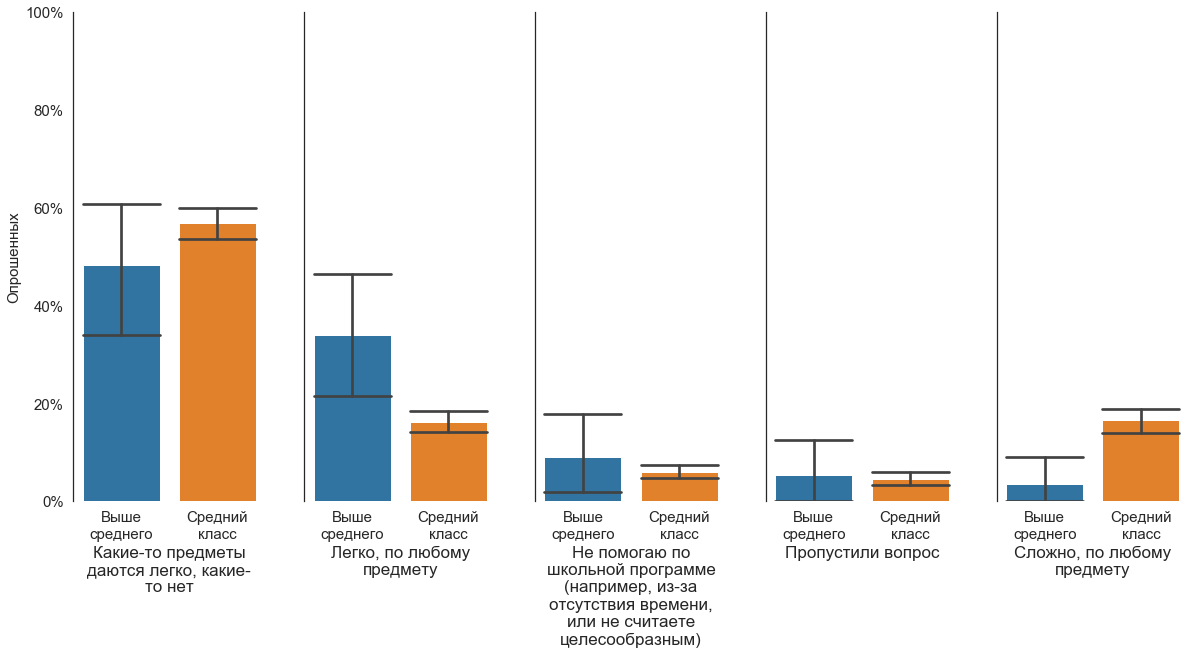

In [109]:
# 32-ый вопрос в разрезе финансого капитала
fig, axs = plt.subplots(1,5)
plt.rcParams['figure.figsize'] = [20, 9]
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)


cnt = 0
sns.set_style("white")
for col in q32_data:
    g = sns.barplot(x="fin_situation", y=col,
            capsize=.8,
            data=q32_data,
            order=['Выше среднего','Средний класс'], ax=axs[cnt])
    g.set_xlabel('\n'.join(wrap(col,20)), fontsize=17, wrap=True)
    g.set_ylabel('Опрошенных',fontsize=15)
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))
    
    labels = ['Выше среднего', 'Средний класс']
    labels = [ '\n'.join(wrap(l,10)) for l in labels ]
    g.set_xticklabels(labels)

    
    if cnt != 0:
        g.set_ylabel('')
        g.set_yticks([])
    cnt +=1
    plt.savefig(col + "_фин.png",bbox_inches='tight')

IndexError: index 5 is out of bounds for axis 0 with size 5

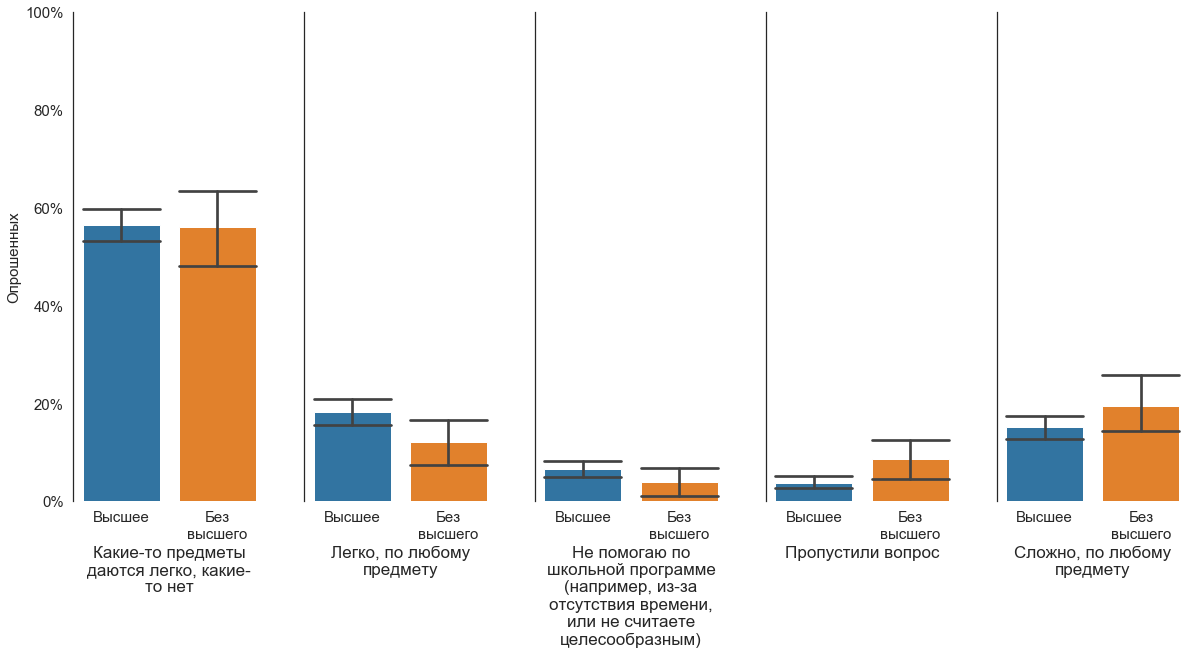

In [110]:
# 32-ый вопрос в разрезе социального капитала

fig, axs = plt.subplots(1,5)
plt.rcParams['figure.figsize'] = [20, 9]
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)


cnt = 0
sns.set_style("white")
for col in q32_data:
    g = sns.barplot(x="q86mom_edu", y=col,
            capsize=.8,
            data=q32_data,
            order=['Высшее','Без высшего'], ax=axs[cnt])
    g.set_xlabel('\n'.join(wrap(col,20)), fontsize=17, wrap=True)
    g.set_ylabel('Опрошенных',fontsize=15)
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))
    
    labels = ['Высшее','Без высшего']
    labels = [ '\n'.join(wrap(l,10)) for l in labels ]
    g.set_xticklabels(labels)

    
    if cnt != 0:
        g.set_ylabel('')
        g.set_yticks([])
    plt.savefig(col + "_соц.png",bbox_inches='tight')
    cnt +=1

In [363]:
pd.set_option('display.max_columns', None) #show all columns 
data.head(2)

,Unnamed: 0,Response.ID,Time.Started,Date.Submitted,Status,IP.Address,Longitude,Latitude,Country,City,State.Region,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade_oldest,grade_preschool,grade_endedschool,birthyear,school,school_rec,gender,q5,q6,q7,q7other,q7other2,q8,q9online_classes_for_edu,q9online_classes_to_test,q9online_classes_for_additional_edu,q9online_classes_didnt_use,q9presentations_school_for_edu,q9presentations_school_to_test,q9presentations_school_for_additional_edu,q9presentations_school_didnt_use,q9platforms_school_for_edu,q9platforms_school_to_test,q9platforms_school_for_add_edu,q9platforms_school_didnt_use,q9books_school_for_edu,q9books_school_to_test,q9books_school_for_add_edu,q9books_school_didnt_use,q9presentations_found_for_edu,q9presentations_found_to_test,q9presentations_found_for_add_edu,q9presentations_found_didnt_use,q9platforms_found_for_edu,q9platforms_found_to_test,q9platforms_found_for_add_edu,q9platforms_found_didnt_use,q9books_found_for_edu,q9books_found_to_test,q9books_found_for_add_edu,q9books_found_didnt_use,q9other_found_for_edu,q9other_found_to_test,q9other_found_for_add_edu,q9other_found_didnt_use,q10control_homework,q10interesting,q10help,q10talk,q10plans,q10friends,q10explain,q10help_homework,q10platforms,q10dop,q11control_homework,q11interesting,q11help,q11talk,q11plans,q11friends,q11explain,q11help_homework,q11platforms,q11dop,q11movies,q11books,q12googleclassroom,q12mesh,q12yandex_uch,q12yandex_sch,q12ya_class,q12uchi,q12internet_urok,q12meo,q12other,q12no,q12other2,q12other3,q13googleclassroom,q13mesh,q13yandex_uch,q13yandex_sch,q13ya_class,q13uchi,q13internet_urok,q13meo,q13other,q13no,q13other2,q13other3,q14,q15mom,q15stepmom,q15dad,q15stepdad,q15grandma,q15grandpa,q15bro_sis,q15nanny,q15other_relatives,q15other,q15nobody,q15other_relatives_text,q15other_text,q15other_rel_text2,q15other_text2,q16play,q16help,q16control,q16clean,q17play,q17help,q17control,q17clean,q18,q18other1,q18other2,q19,q20h,q20min,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,q31teach,q31org,q31support,q31therapy,q31other1,q31other2,q31other3,q32,q33_1,q33_2,q33_3,q33_4,q33_5,q33_6,q33_7,q33_8,q33_9,q33_10,q34_1,q34_2,q34_3,q34_4,q34_5,q34_6,q34_7,q34_8,q34_9,q34_10,q34_11,q34_12,q34other1,q34other2,q34other3,q35_1,q35_2,q35_3,q35_4,q35_5,q35_6,q36_1,q36_2,q36_3,q36_4,q36_5,q36_6,q36_7,q37,q38sport,q38lang,q38art,q38science,q38vuz,q38other,q38no,q38other2,q38other3,q39_1,q39_2,q39_3,q39_4,q39other,q39no,q39other2,q40,q41_1,q41_2,q41_3,q41_4,q41_5,q41_6,q42_1,q42_2,q42_3,q42other,q42no,q42other2,q42other3,q43_1,q43_2,q43_3,q43_4,q43_5,q43_6,q43_7,q43_8,q43_9,q43_10,q44_1,q44_2,q44_3,q44_4,q44_5,q44_6,q44_7,q44_8,q44_9,q44_10,q44_11,q44_12,q44_13,q44_14,q44_15,q44_16,q44_17,q45_1,q45_2,q45_3,q45_4,q.O,qДр,qДр_1,qДр_2,q46_1,q46_2,q46_3,q46_4,q46_5,q46_6,q46_7,q46other1,q46other2,q47,q48,q49,q50,q51,q52,q53_1,q53_2,q53_3,q53other1,q53other2,q53other3,q54,q55,q55_2,q56h,q56min,q57_1,q57_2,q57_3,q57_4,q57_5,q58,q59,q60,q61_1,q61_2,q61_3,q61_4,q61_5,q61_6,q62,q63,q64,q65,q66,q67,q67_other_rel,q67_other,q68birthyear_mom,q68birthyear_dad,q69mom,q69stepmom,q69dad,q69stepdad,q69bro,q69sis,q69grandma,q69grandpa,q69other_rel,q69other,q69other_rel_text,q69other_text,q70,q71,q72,q73,q73other,q74,q75h,q75min,q76,q76other,q77,q78,q79,q80,q80other,q81,q82hour,q82min,q83,q83other,q84,q85,q86mom_edu,q86dad_edu,q87room,q88auto,q89income,q90month,q90name,q90letter,na_count
0,1,30,30.04.2020 17:29,30.04.2020 17:32,Partial,176.59.103.99,44.0019,56.3283,Russian Federation,Nizhniy Novgorod,51,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,7 класс,8 класс,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,2005.0,2110,2110,Мужской,"Да, школа сейчас закрыта, дети на дистанционно...",Пропустили вопрос,Очно,Пропустили вопрос,Пропустили вопрос,Месяц,Пропустили вопрос,Пропустили вопрос,"Для допо

In [31]:
#34 вопрос в разрезе социального капитала 

q34_col_name = ['Сложно найти заданные домашние задания',
               'Сложно разобраться с расписанием: когда и как будут проходить занятия, какие занятия',
               'Неудобно отправлять домашние задания',
               'Технические сбои платформ дистанционного обучения',
               'Технические проблемы с электронными устройствами',
               'Технические проблемы с интернетом',
               'Нехватка времени на помощь ребенку с учебой',
               'Эмоциональное перенапряжение при работе с ребенком',
               'Не хватает навыков для использования образовательных онлайн-сервисов',
               'Ребенок и другие члены семьи мешают друг другу заниматься',
               'Нет нужных технических устройств',
               'Не испытываю трудностей']

q34_data = data_mom_edu.loc[:,'q34_1':'q34_12']
q34_data_filtrd = q34_data[(q34_data['q34_1'] != 'Пропустили вопрос') | 
                           (q34_data['q34_2'] != 'Пропустили вопрос') |
                           (q34_data['q34_3'] != 'Пропустили вопрос') | 
                           (q34_data['q34_4'] != 'Пропустили вопрос') |
                           (q34_data['q34_5'] != 'Пропустили вопрос') | 
                           (q34_data['q34_6'] != 'Пропустили вопрос') |
                           (q34_data['q34_7'] != 'Пропустили вопрос') |
                           (q34_data['q34_8'] != 'Пропустили вопрос') |
                           (q34_data['q34_9'] != 'Пропустили вопрос') |
                           (q34_data['q34_10'] != 'Пропустили вопрос') |
                           (q34_data['q34_11'] != 'Пропустили вопрос') |
                           (q34_data['q34_12'] != 'Пропустили вопрос')]

plt.rcParams['figure.figsize'] = [10, 9]
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)

cnt=0
for col in q34_data_filtrd:
    q34_dummies = pd.get_dummies(q34_data_filtrd[col])
    q34_dummies['fin_situation'] = data_mom_edu.apply(FinSit_calssifier, axis=1)
    q34_dummies['q86mom_edu'] = data_mom_edu['q86mom_edu']
    g = sns.barplot(x="q86mom_edu", y=q34_dummies[q34_col_name[cnt]],  
            order = ['Высшее', 'Без высшего'],
            capsize=.8,
            data=q34_dummies)
    
    
    
    g.set_xlabel('\n'.join(wrap(q34_col_name[cnt],60)), fontsize=17, wrap=True)
    g.set_ylabel('Опрошенных',fontsize=15)
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))
    plt.savefig(str(cnt)+ '_соц_' + ".png",bbox_inches='tight')
    plt.clf()
    cnt +=1

<Figure size 720x648 with 0 Axes>

In [143]:
#34 вопрос в разрезе финансого состояния 

q34_col_name = ['Сложно найти заданные домашние задания',
               'Сложно разобраться с расписанием: когда и как будут проходить занятия, какие занятия',
               'Неудобно отправлять домашние задания',
               'Технические сбои платформ дистанционного обучения',
               'Технические проблемы с электронными устройствами',
               'Технические проблемы с интернетом',
               'Нехватка времени на помощь ребенку с учебой',
               'Эмоциональное перенапряжение при работе с ребенком',
               'Не хватает навыков для использования образовательных онлайн-сервисов',
               'Ребенок и другие члены семьи мешают друг другу заниматься',
               'Нет нужных технических устройств',
               'Не испытываю трудностей']

q34_data_filtrd = q34_data[(q34_data['q34_1'] != 'Пропустили вопрос') | 
                           (q34_data['q34_2'] != 'Пропустили вопрос') |
                           (q34_data['q34_3'] != 'Пропустили вопрос') | 
                           (q34_data['q34_4'] != 'Пропустили вопрос') |
                           (q34_data['q34_5'] != 'Пропустили вопрос') | 
                           (q34_data['q34_6'] != 'Пропустили вопрос') |
                           (q34_data['q34_7'] != 'Пропустили вопрос') |
                           (q34_data['q34_8'] != 'Пропустили вопрос') |
                           (q34_data['q34_9'] != 'Пропустили вопрос') |
                           (q34_data['q34_10'] != 'Пропустили вопрос') |
                           (q34_data['q34_11'] != 'Пропустили вопрос') |
                           (q34_data['q34_12'] != 'Пропустили вопрос')]

plt.rcParams['figure.figsize'] = [10, 9]
sns.despine(left=False, bottom=True, right=True)

rc={'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc, style="white", palette="tab10")
plt.rcParams.update(**rc)

cnt=0
for col in q34_data_filtrd:
    q34_dummies = pd.get_dummies(q34_data_filtrd[col])
    q34_dummies['fin_situation'] = data_mom_edu.apply(FinSit_calssifier, axis=1)
    q34_dummies['q86mom_edu'] = data_mom_edu['q86mom_edu']
    g = sns.barplot(x="fin_situation", y=q34_dummies[q34_col_name[cnt]],  
            order = ['Выше среднего', 'Средний класс'],
            capsize=.8,
            data=q34_dummies)
    
    
    
    g.set_xlabel('\n'.join(wrap(q34_col_name[cnt],60)), fontsize=17, wrap=True)
    g.set_ylabel('Опрошенных',fontsize=15)
    g.set(ylim=(0, 1))
    g.yaxis.set_major_formatter(PercentFormatter(1))
    plt.savefig(str(cnt)+ '_фин_' + ".png",bbox_inches='tight')
    plt.clf()
    cnt +=1

<Figure size 720x648 with 0 Axes>